## Analyse Exploratoire des Données Étudiantes – UCAD

###  Contexte

Ce notebook s'inscrit dans le cadre de mon stage de deux mois au sein de la **Direction des Études et des Statistiques (DES)** de l’Université Cheikh Anta Diop (UCAD), sous la supervision du Directeur de la DES et du Chef de la Division Statistiques.

L’objectif global de ce stage est de **valoriser les données sur les effectifs** (étudiant) via des analyses statistiques

### Objectif du notebook

Ce notebook est consacré à la **phase d’analyse exploratoire des données (EDA)**. Elle constitue une étape fondamentale avant toute modélisation prédictive, car elle permet de :
- Comprendre la structure et la qualité des données disponibles,
- Détecter les **anomalies déjà identifiées** par l'équipe,
- Réaliser des statistiques descriptives pour faire émerger les **tendances générales**,
- Inseights Pertinents
- Préparer un jeu de données propre pour la suite du travail (modélisation machine learning).

---

###  Données utilisées

Les données portent sur les effectifs étudiants de l’UCAD, répartis par année, niveau, département, sexe, nationalité, etc. Elles sont actuellement **brutes** et présentent certaines **anomalies connues** (incohérences de dates, doublons, valeurs manquantes, formats hétérogènes).

---

### Outils et technologies

Ce travail est réalisé en Python, à l’aide des bibliothèques suivantes :
- `pandas` / `numpy` pour le traitement des données,
- `matplotlib` / `seaborn` pour les visualisations,


---

###  Étapes prévues dans ce notebook

0. **verifier que les fichiers ont les meme colonne**
1. **Chargement et aperçu des données**
2. **Analyse des valeurs manquante**
3. **Données Démographiques**
4. **Historique Académique**
5. **Parcours Universitaire**
6. **Résumé et interprétations**




##### Partie 0 : verifier que les fichiers ont les meme colonne

In [2]:
#collone de reference
import pandas as pd
import glob  as glob
import os
data= pd.read_csv("C:/Users/HP/Desktop/mon_stage_senegal/code/data/Etudiants_2001_2024/Liste_globale_des_etudiants_tous_les_champs20012002.csv" , encoding='latin1' ,sep=';')
# Chemin vers le dossier contenant les fichiers
dossier = "C:/Users/HP/Desktop/mon_stage_senegal/code/data/Etudiants_2001_2024"

colonnes_reference = set(data.columns)  # Colonnes de référence
fichiers_csv = glob.glob(os.path.join(dossier, '*.csv'))
#Vérifier les colonnes de chaque fichier
for fichier in fichiers_csv:
    data = pd.read_csv(fichier, encoding='latin1', sep=';')
    colonnes_actuelles = set(data.columns)
    if colonnes_actuelles != colonnes_reference:
        print(f"Les colonnes de {os.path.basename(fichier)} sont différentes de celles du fichier de référence(fichier 2001-2002).")
        print(f"Colonnes manquantes dans {os.path.basename(fichier)} :", colonnes_reference - colonnes_actuelles)
        print(f"Colonnes supplémentaires dans {os.path.basename(fichier)} :", colonnes_actuelles - colonnes_reference)
        
print(f"✅Les colonnes des fichiers sont identiques  au fichier de référence(fichier 2001-2002).")

✅Les colonnes des fichiers sont identiques  au fichier de référence(fichier 2001-2002).


observation : Tous les fichiers disposent des memes noms de colonnes, ce qui permet de les concatener directement sans difficulte. Cette homogénéité structurelle facilite la fusion des données en un seul DataFrame global, regroupant l'ensemble des effectifs étudiants sur les différentes années universitaires analysées

### chargement et apercu des données 


In [3]:
#================concater les fichiers pour creer un dataframe complet 
if fichiers_csv:  # Vérifier qu'il y a des fichiers CSV dans le dossier
    df_total = pd.concat(
        (pd.read_csv(fichier, encoding='latin1', sep=';', low_memory=False)
         .assign(source=os.path.basename(fichier)) for fichier in fichiers_csv),
        ignore_index=True
    )
    print("Les fichiers ont été concaténés avec succès.")
else:
    print("Aucun fichier CSV trouvé dans le dossier spécifié.")
    
df_2023 = df_total[df_total['ANNEE_UNIVERSITAIRE'] == '2023-2024']   


Les fichiers ont été concaténés avec succès.


In [4]:
# Après la concaténation de df_total, ajoute cette ligne :
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], dayfirst=True, errors='coerce')
df_total.head(10)


,NUMERO,NUMERO_TABLE,INE,NUMERO_IDENTITIFICATION,NOM,PRENOM,DATE_DE_NAISSANCE,LIEU_DE_NAISSANCE,MAIL_INSTITUTIONNEL,SEXE,...,ANNEE_UNIVERSITAIRE,TYPE_FORMATION,CODE_NIVEAU,NIVEAU,DATE_INSCRIPTION,NIVEAU LMD,NIVEAU LMD ET NON LMD,SYSTEME,DEPARTEMENT FORMATION,source
0,.199900UB6,NaN,X00026820131,.1218198401244,BA,Alassane,03/05/1967,TENEFOUL,alassane5.ba@ucad.edu.sn,M,...,2001-2002,I,6,Sixième Année,2001-12-11,NaN,6A,Classique,Mathématiques-Informatique,Liste_globale_des_etudiants_tous_les_champs200...
1,.199800OAE,NaN,NaN,.,KANDE,Mountaga,29/10/1977,KOLDA,NaN,M,...,2001-2002,I,4,Quatrième Année,2001-12-12,NaN,4A,Classique,Génie Civil,Liste_globale_des_etudiants_tous_les_champs200...
2,.199700H5O,NaN,NaN,.,DIOP,Amadou Lamine,29/12/1974,MEKHE,NaN,M,...,2001-2002,I,4,Quatrième Année,2001-11-10,NaN,4A,Classique,Economie,Liste_globale_des_etudiants_tous_les_champs200...
3,.199700I36,NaN,NaN,.,DIOP,Awa,27/03/1971,DAKAR,NaN,F,...,2001-2002,I,5,Cinquième Année,2002-02-01,M2,M2,LMD,Institut de Formation en Administration et Cré...,Liste_globale_des_etudiants_tous_les_champs200...
4,.199800NC9,NaN,NaN,.,DRAME,Mamadou Lamine,09/03/1979,DAKAR,NaN,M,...,2001-2002,I,4,Quatrième Année,2001-11-19,NaN,4A,Classique,Economie,Liste_globale_des_etudiants_tous_les_champs200...
5,.199900TPD,NaN,NaN,.,BOP,Ndèye,03/11/1977,DAKAR,NaN,F,...,2001-2002,I,1,Première Année,2002-03-07,L1,L1,LMD,Institut de Formation en Administration et Cré...,Liste_globale_des_etudiants_tous_les_champs200...
6,.199900TZS,NaN,NaN,.,NDIAYE,Marième,13/05/1977,DAKAR,NaN,F,...,2001-2002,I,2,Deuxième Année,2001-12-04,NaN,2A,Classique,Gestion,Liste_globale_des_etudiants_tous_les_champs200...
7,.199900U28,NaN,NaN,.,BAKHOUM,Ndéye Nafi,09/04/1977,DAKAR,NaN,F,...,2001-2002,I,2,Deuxième Année,2001-11-14,NaN,2A,Classique,Gestion,Liste_globale_des_etudiants_tous_les_champs200...
8,.1995000ZR,NaN,NaN,.,KEITA,Ndeye Ndiate,03/03/1975,DAKAR,NaN,F,...,2001-2002,I,4,Quatrième Année,2002-01-17,M1,M1,LMD,Anglais,Liste_globale_des_etudiants_tous_les_champs200...
9,.19950009W,NaN,NaN,.,NDOUR,Diamé Ndéb,10/10/1974,BACOBOF,NaN,M,...,2001-2002,I,3,Troisième Année,2001-12-04,NaN,3A,Classique,Géographie,Liste_globale_des_etudiants_tous_les_champs200...


In [5]:
df_total.columns

Index(['NUMERO', 'NUMERO_TABLE', 'INE', 'NUMERO_IDENTITIFICATION', 'NOM',
       'PRENOM', 'DATE_DE_NAISSANCE', 'LIEU_DE_NAISSANCE',
       'MAIL_INSTITUTIONNEL', 'SEXE', 'MENTION_BACC', 'ANNEE_BACC',
       'PAYS_DE_NAISSANCE', 'NATIONALITE', 'SERIE_BACC', 'REGION_DE_NAISSANCE',
       'ETABLISSMENT_CODE', 'ETABLISSEMENT', 'NIVEAU_SECTION',
       'SIGLE_NIVEAU_SECTION', 'COHORTE', 'ETAT_INSCRIPTION',
       'ANNEE_INSCRIPTION', 'ANNEE_UNIVERSITAIRE', 'TYPE_FORMATION',
       'CODE_NIVEAU', 'NIVEAU', 'DATE_INSCRIPTION', 'NIVEAU LMD',
       'NIVEAU LMD ET NON LMD', 'SYSTEME', 'DEPARTEMENT FORMATION', 'source'],
      dtype='object')

In [6]:
df_2023.info()  # Afficher les premières lignes du DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 88946 entries, 1473344 to 1562289
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUMERO                   88946 non-null  object 
 1   NUMERO_TABLE             51669 non-null  float64
 2   INE                      75953 non-null  object 
 3   NUMERO_IDENTITIFICATION  88946 non-null  object 
 4   NOM                      88946 non-null  object 
 5   PRENOM                   88946 non-null  object 
 6   DATE_DE_NAISSANCE        88946 non-null  object 
 7   LIEU_DE_NAISSANCE        88946 non-null  object 
 8   MAIL_INSTITUTIONNEL      88881 non-null  object 
 9   SEXE                     88946 non-null  object 
 10  MENTION_BACC             88926 non-null  object 
 11  ANNEE_BACC               88926 non-null  float64
 12  PAYS_DE_NAISSANCE        88946 non-null  object 
 13  NATIONALITE              88946 non-null  object 
 14  SERIE_BACC         

observation : 
Apres avoir fusionne les fichiers CSV correspondant aux années universitaires de 2001 a 2025, nous avons obtenu un DataFrame contenant environ **1595039** et **32 colonnes**. Voici les premières observations générales sur la structure et le contenu des données :

- Les noms de colonnes sont globalement cohérents entre les fichiers, bien que certains puissent présenter des **variations de casse, d'espacement ou de format** qu'il faudra harmoniser (ex. "niveau lmd", "niveau LMD ", etc.).
- Certaines colonnes semblent **redondantes** ou peu informatives à ce stade (ex. colonnes vides). 

- La majorité des colonnes sont de type `object` (chaines de caracteres), y compris des colonnes numériques mal typées (ex. "année de bac", "niveau", "numéro").
- Certaines colonnes devraient idéalement être converties en types numériques (`int`, `float`) ou en dates (`datetime`) pour permettre des traitements plus précis. 
- Plusieurs colonnes présentent **un nombre significatif de valeurs manquantes**, notamment Les informations sur le **département**, **la série de bac**, **la nationalité** ou **la structure d’accueil** des colonnes comme `"niveau LMD"` ou `"code faculté"` peuvent contenir des **valeurs vides ou 'inconnu'**.

##### Partie1 :  Analyse des valeurs manquantes et anomalies connus

In [7]:

import matplotlib.pyplot as plt
from tabulate import tabulate
#============detecter les valeurs manquantes ===============
valeurs_manquantes = df_2023.isnull().sum()
pourcentage_valeurs_manquantes = (valeurs_manquantes / len(df_2023)) * 100

#tableau recapitulatif des valeurs manquantes
tableau_valeurs_manquantes = pd.DataFrame({
    'Colonnes' : df_total.columns,
    'Valeurs manquantes': valeurs_manquantes,
    'Pourcentage': pourcentage_valeurs_manquantes
    }) .sort_values(by='Valeurs manquantes', ascending=False) 

#les colonnes critiques avec plus de 50% de valeurs manquantes
colonnes_critique = tableau_valeurs_manquantes[tableau_valeurs_manquantes['Pourcentage'] > 0]

#visualisation des valeurs manquantes
print("Tableau récapitulatif des valeurs manquantes :")
print(tabulate(colonnes_critique, headers='keys', tablefmt='psql', showindex=False))




Tableau récapitulatif des valeurs manquantes :
+---------------------+----------------------+---------------+
| Colonnes            |   Valeurs manquantes |   Pourcentage |
|---------------------+----------------------+---------------|
| COHORTE             |                75789 |    85.2079    |
| NUMERO_TABLE        |                37277 |    41.9097    |
| NIVEAU LMD          |                15719 |    17.6725    |
| INE                 |                12993 |    14.6077    |
| REGION_DE_NAISSANCE |                 4602 |     5.17393   |
| SERIE_BACC          |                 1265 |     1.42221   |
| MAIL_INSTITUTIONNEL |                   65 |     0.073078  |
| ANNEE_BACC          |                   20 |     0.0224856 |
| MENTION_BACC        |                   20 |     0.0224856 |
+---------------------+----------------------+---------------+


## Partie1 :Données Démographiques

#### evolution des etudiants de 2001 a 2025

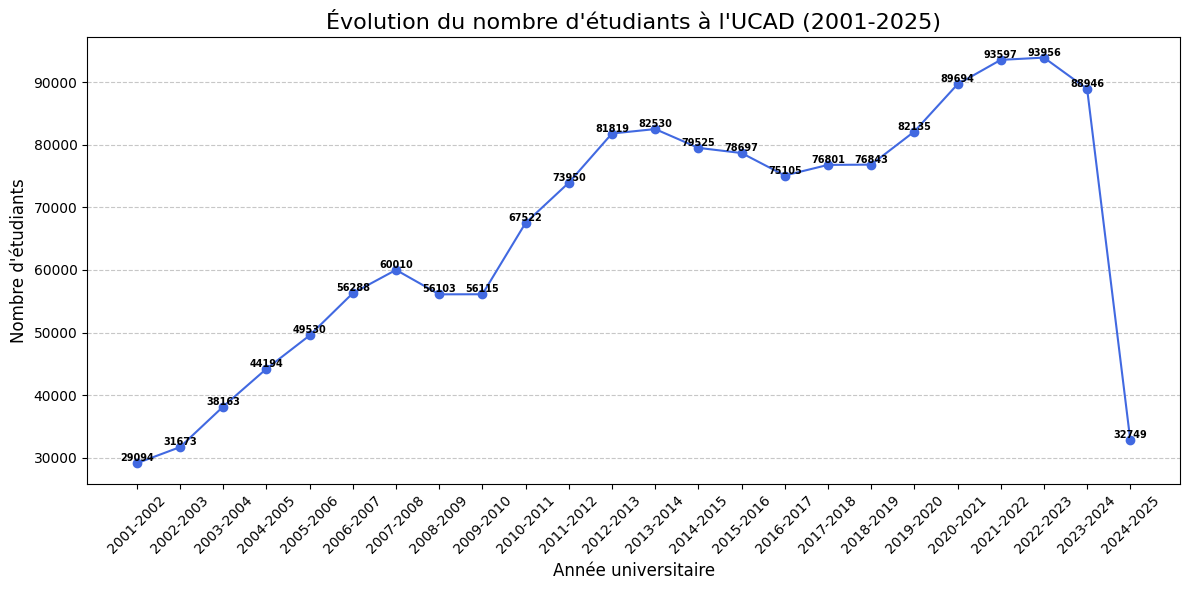

In [8]:
# Evolution du nombre d'étudiants de 2001 à 2025 (courbe) avec valeurs exactes sur le graphique
import matplotlib.pyplot as plt

evolution = df_total.groupby('ANNEE_UNIVERSITAIRE')['NUMERO'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(evolution['ANNEE_UNIVERSITAIRE'], evolution['NUMERO'], marker='o', color='royalblue')
for i, val in enumerate(evolution['NUMERO']):
    plt.text(evolution['ANNEE_UNIVERSITAIRE'][i], val, str(val), ha='center', va='bottom', fontsize=7, fontweight='bold')

plt.title("Évolution du nombre d'étudiants à l'UCAD (2001-2025)", fontsize=16)
plt.xlabel("Année universitaire", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La courbe montre une croissance réguliere du nombre d'étudiants à l'UCAD de 2001 à 2023, avec un pic autour de 2022-2023. On observe une forte baisse en 2024-2025 Globalement, l'université connait une forte augmentation de ses effectifs sur la période étudiée

#### Répartition en fonction de l'age

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2415331122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['TRANCHE_AGE'] = pd.cut(df_total['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)


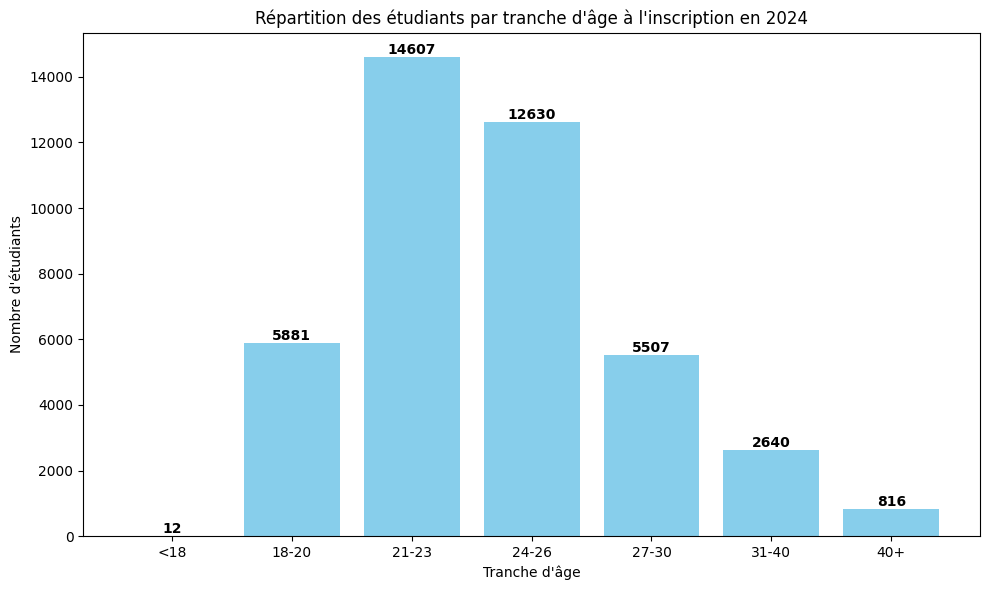

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

# S'assurer que les colonnes sont bien au format datetime
df_total['DATE_DE_NAISSANCE'] = pd.to_datetime(df_total['DATE_DE_NAISSANCE'], errors='coerce')
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], errors='coerce')

# Calculer l'âge à l'inscription
df_total['AGE_INSCRIPTION'] = (df_total['DATE_INSCRIPTION'] - df_total['DATE_DE_NAISSANCE']).dt.days // 365

# Définir les tranches d'âge
bins = [0, 17, 20, 23, 26, 30, 40, 100]
labels = ['<18', '18-20', '21-23', '24-26', '27-30', '31-40', '40+']
df_2023['TRANCHE_AGE'] = pd.cut(df_total['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)

# Compter le nombre d'étudiants par tranche d'âge
age_counts = df_2023['TRANCHE_AGE'].value_counts().sort_index()

# Afficher le diagramme
plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title("Répartition des étudiants par tranche d'âge à l'inscription en 2024")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'étudiants")

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

La majorité des étudiants s'inscrivent à l'UCAD entre 21 et 26 ans, avec un pic dans la tranche 21-23 ans. Les inscriptions restent possibles à tout age, mais deviennent plus rares après 30 ans.

#### Répartition par sexe


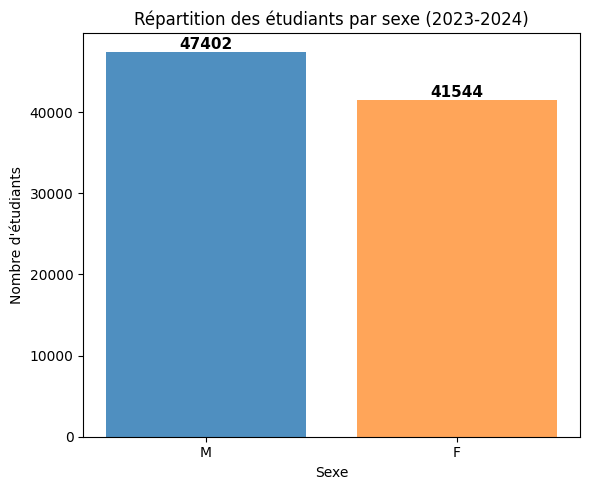

In [10]:
import matplotlib.pyplot as plt

# Répartition par sexe pour l'année 2023-2024
sexe_counts = df_2023['SEXE'].value_counts()

plt.figure(figsize=(6, 5))
bars = plt.bar(sexe_counts.index, sexe_counts.values, color=['#4F8FC0', '#FFA559'])
plt.title("Répartition des étudiants par sexe (2023-2024)")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'étudiants")

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Historique Académique

In [11]:
# --- Mention au Bac normalisée (encodage ordinal) ---
#prendre tous sauf les mentions mauvaises
menttion_valide = ['PA', 'AB', 'BI', 'TB']
df_2023 = df_2023[df_2023['MENTION_BACC'].str.upper().isin(menttion_valide)]

mention_map = {
    'PA': 'Passable',
    'AB': "Assez Bien",
    'BI': 'Bien',
    'TB': 'Tres Bien'
}
df_2023['MENTION_BAC_NORM'] = df_2023['MENTION_BACC'].str.upper().map(mention_map)

# --- Délai Bac-Université (différence entre ANNEE_BACC et ANNEE_INSCRIPTION) ---
df_2023['ANNEE_BACC'] = pd.to_numeric(df_2023['ANNEE_BACC'], errors='coerce')
df_2023['ANNEE_INSCRIPTION'] = pd.to_numeric(df_2023['ANNEE_INSCRIPTION'], errors='coerce')
df_2023['DELAI_BAC_UNIV'] = df_2023['ANNEE_INSCRIPTION'] - df_2023['ANNEE_BACC']

# --- Indicateur de série Bac (scientifique, littéraire, tertiaire) ---
def serie_bac_type(serie):
    s = str(serie).upper().strip()
    if any(x in s for x in ['S', 'SCI', 'D', 'E', 'F6', 'F4', 'F5']):
        return 'Scientifique'
    elif any(x in s for x in ['L', 'A', 'AR', 'L1', 'L2', 'L\'', 'L ']):
        return 'Littéraire'
    elif any(x in s for x in ['G', 'T', 'STG', 'S1', 'S2', 'S3', 'S4', 'S5']):
        return 'Tertiaire'
    else:
        return 'Autre'

df_2023['BAC_TYPE'] = df_2023['SERIE_BACC'].apply(serie_bac_type)



#### Graphe : Répartition des mentions au Bac 

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\3053612067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='viridis')


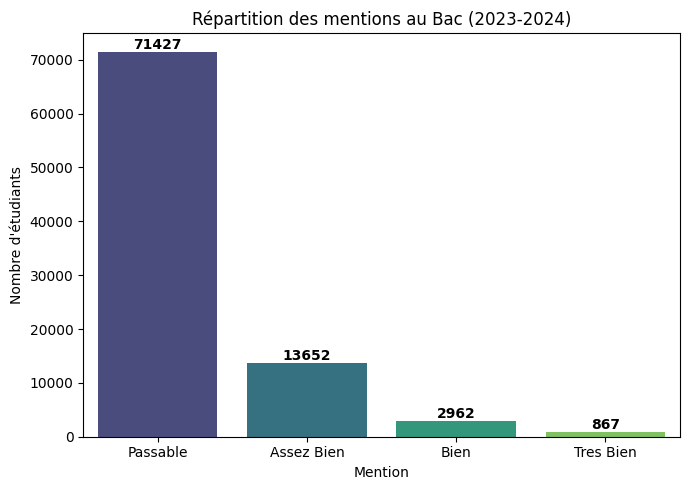

In [12]:

import seaborn as sns
mention_order = ['Passable', 'Assez Bien', 'Bien', 'Tres Bien']
mention_counts = df_2023['MENTION_BAC_NORM'].value_counts().reindex(mention_order)

plt.figure(figsize=(7, 5))
sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='viridis')
plt.title("Répartition des mentions au Bac (2023-2024)")
plt.xlabel("Mention")
plt.ylabel("Nombre d'étudiants")
for i, v in enumerate(mention_counts.values):
    if pd.notnull(v):
        plt.text(i, v + 50, int(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

#### Répartition par type de série Bac

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\956417470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bac_type_counts.index, y=bac_type_counts.values, palette='Set2')


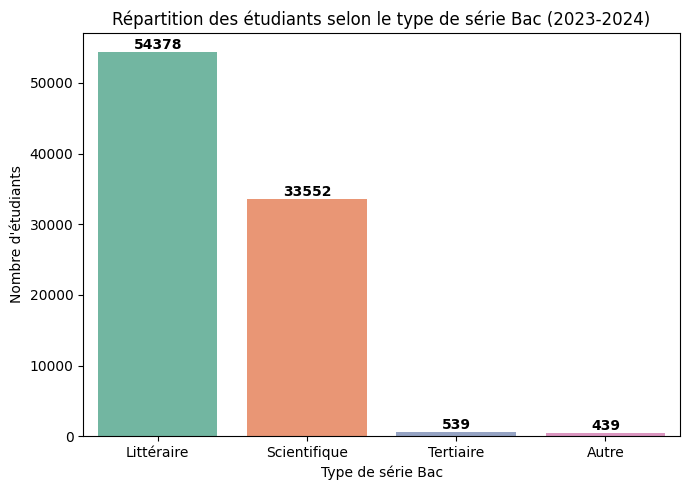

In [13]:
bac_type_counts = df_2023['BAC_TYPE'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=bac_type_counts.index, y=bac_type_counts.values, palette='Set2')
plt.title("Répartition des étudiants selon le type de série Bac (2023-2024)")
plt.xlabel("Type de série Bac")
plt.ylabel("Nombre d'étudiants")
for i, v in enumerate(bac_type_counts.values):
    plt.text(i, v + 50, int(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## Parcours Universitaire

#### Progression académique (évolution du NIVEAU LMD sur les années)

### Objectif : Comprendre les facteurs qui expliquent le redoublement en L1 à l'UCAD de 2001 à 2024, en exploitant toutes les données disponibles.

In [14]:
# afficher tous les colonnes
pd.set_option('display.max_columns', None)
df_total.columns

Index(['NUMERO', 'NUMERO_TABLE', 'INE', 'NUMERO_IDENTITIFICATION', 'NOM',
       'PRENOM', 'DATE_DE_NAISSANCE', 'LIEU_DE_NAISSANCE',
       'MAIL_INSTITUTIONNEL', 'SEXE', 'MENTION_BACC', 'ANNEE_BACC',
       'PAYS_DE_NAISSANCE', 'NATIONALITE', 'SERIE_BACC', 'REGION_DE_NAISSANCE',
       'ETABLISSMENT_CODE', 'ETABLISSEMENT', 'NIVEAU_SECTION',
       'SIGLE_NIVEAU_SECTION', 'COHORTE', 'ETAT_INSCRIPTION',
       'ANNEE_INSCRIPTION', 'ANNEE_UNIVERSITAIRE', 'TYPE_FORMATION',
       'CODE_NIVEAU', 'NIVEAU', 'DATE_INSCRIPTION', 'NIVEAU LMD',
       'NIVEAU LMD ET NON LMD', 'SYSTEME', 'DEPARTEMENT FORMATION', 'source',
       'AGE_INSCRIPTION'],
      dtype='object')

In [15]:
df_total['NIVEAU LMD ET NON LMD'].unique()

array(['6A', '4A', 'M2', 'L1', '2A', 'M1', '3A', '5A', 'L2', '8A', '9A',
       'D', '7A', '1A', '0A', 'L3', '11A', '10A', '12A', 'Doctorat',
       'Master', 'M5', 'M6'], dtype=object)

In [16]:
l1_2021 = df_total[
    (df_total['ANNEE_UNIVERSITAIRE'] == '2021-2022') &
    (df_total['NIVEAU LMD ET NON LMD'].str.upper().str.contains('L1|1A', na=False, regex=True))
]

print(f"Nombre d'étudiants en L1 en 2021-2022 : {len(l1_2021)}")

Nombre d'étudiants en L1 en 2021-2022 : 33324


In [17]:

l1_2021 = df_total[
    (df_total['ANNEE_UNIVERSITAIRE'] == '2021-2022') &
    (df_total['NIVEAU LMD ET NON LMD'].str.upper().str.contains('L1|1A', na=False, regex=True))
]

l1_2022 = df_total[
    (df_total['ANNEE_UNIVERSITAIRE'] == '2022-2023') &
    (df_total['NIVEAU LMD ET NON LMD'].str.upper().str.contains('L1|1A', na=False, regex=True))
]

# 3. Merge sur NUMERO ET DEPARTEMENT FORMATION
redoublants_2022 = pd.merge(
    l1_2021[['NUMERO', 'DEPARTEMENT FORMATION']],
    l1_2022[['NUMERO', 'DEPARTEMENT FORMATION']],
    on=['NUMERO', 'DEPARTEMENT FORMATION'],
    how='inner' 
)

nb_redoublants = len(redoublants_2022)
nb_l1_2021 = len(l1_2021)

pourcentage_redoublement = nb_redoublants / nb_l1_2021 * 100 if nb_l1_2021 > 0 else 0

print(f"Nombre d'étudiants redoublants en L1 pour 2022-2023 (même formation) : {nb_redoublants}")
print(f"✅ Pourcentage de redoublement en L1 (2022-2023, même formation) : {pourcentage_redoublement:.2f}%")


Nombre d'étudiants redoublants en L1 pour 2022-2023 (même formation) : 6329
✅ Pourcentage de redoublement en L1 (2022-2023, même formation) : 18.99%


harmoniser le dataframe

In [18]:
# --- Mention au Bac normalisée (encodage ordinal) ---
#prendre tous sauf les mentions mauvaises
menttion_valide = ['PA', 'AB', 'BI', 'TB']
df_total = df_total[df_total['MENTION_BACC'].str.upper().isin(menttion_valide)]

mention_map = {
    'PA': 'Passable',
    'AB': "Assez Bien",
    'BI': 'Bien',
    'TB': 'Tres Bien' 
     
}
df_total['MENTION_BAC_NORM'] = df_total['MENTION_BACC'].str.upper().map(mention_map)

l1_2021['MENTION_BAC_NORM'] = l1_2021['MENTION_BACC'].str.upper().map(mention_map)

# --- Indicateur de série Bac (scientifique, littéraire, tertiaire) ---
def serie_bac_type(serie):
    s = str(serie).upper().strip()
    if any(x in s for x in ['S', 'SCI', 'D', 'E', 'F6', 'F4', 'F5']):
        return 'Scientifique'
    elif any(x in s for x in ['L', 'A', 'AR', 'L1', 'L2', 'L\'', 'L ']):
        return 'Littéraire'
    elif any(x in s for x in ['G', 'T', 'STG', 'S1', 'S2', 'S3', 'S4', 'S5']):
        return 'Tertiaire'
    else:
        return 'Autre'

df_total['BAC_TYPE'] = df_total['SERIE_BACC'].apply(serie_bac_type)
l1_2021['BAC_TYPE'] = l1_2021['SERIE_BACC'].apply(serie_bac_type)

taux de redoublement par sexe ,  Mention du Bac , Série du Bac ,  Région/Pays d’origine

In [19]:
# Pour chaque mention du bac
nb_redoublants_par_mention = l1_2021[l1_2021['NUMERO'].isin(redoublants_2022['NUMERO'])].groupby('MENTION_BAC_NORM')['NUMERO'].nunique() 
nb_l1_par_mention = l1_2021.groupby('MENTION_BAC_NORM')['NUMERO'].nunique()
taux_par_mention = (nb_redoublants_par_mention / nb_l1_par_mention).fillna(0)

# Pour chaque série du bac
nb_redoublants_par_serie = l1_2021[l1_2021['NUMERO'].isin(redoublants_2022['NUMERO'])].groupby('BAC_TYPE')['NUMERO'].nunique()
nb_l1_par_serie = l1_2021.groupby('BAC_TYPE')['NUMERO'].nunique()
taux_par_serie = (nb_redoublants_par_serie / nb_l1_par_serie).fillna(0)



C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2066491358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_par_mention.index, y=taux_par_mention.values, palette='Set1')


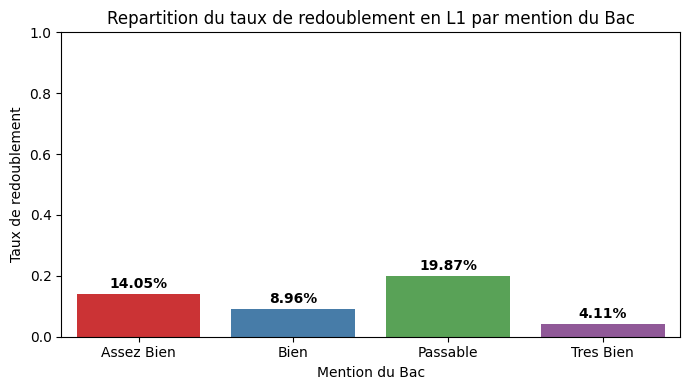

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2066491358.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_par_serie.index, y=taux_par_serie.values, palette='Set3')


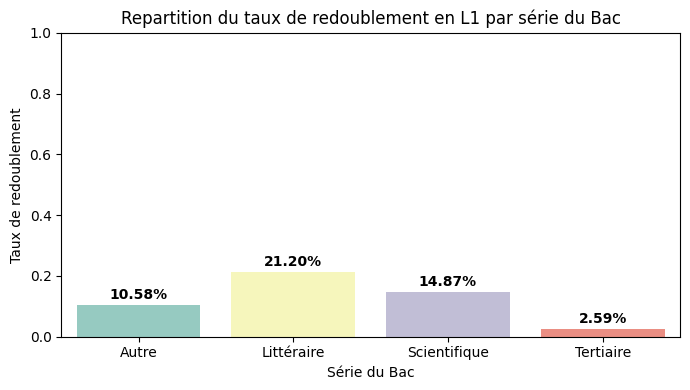

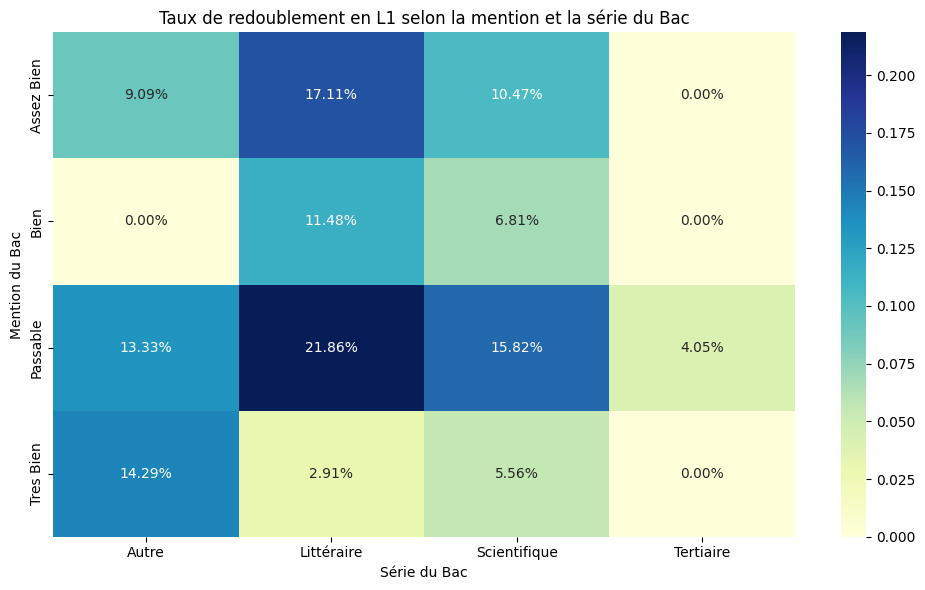

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.barplot(x=taux_par_mention.index, y=taux_par_mention.values, palette='Set1')
plt.title("Repartition du taux de redoublement en L1 par mention du Bac")
plt.ylabel("Taux de redoublement")
plt.xlabel("Mention du Bac")
plt.ylim(0, 1)
for i, v in enumerate(taux_par_mention.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(x=taux_par_serie.index, y=taux_par_serie.values, palette='Set3')
plt.title("Repartition du taux de redoublement en L1 par série du Bac")
plt.ylabel("Taux de redoublement")
plt.xlabel("Série du Bac")
plt.ylim(0, 1)
for i, v in enumerate(taux_par_serie.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


# Table croisée redoublants
redoublants_l1_2021 = l1_2021[l1_2021['NUMERO'].isin(redoublants_2022['NUMERO'])]
table_redoublants = pd.crosstab(
    redoublants_l1_2021['MENTION_BAC_NORM'],
    redoublants_l1_2021['BAC_TYPE'],
    values=redoublants_l1_2021['NUMERO'],
    aggfunc='nunique'
)

# Table croisée total inscrits
table_inscrits = pd.crosstab(
    l1_2021['MENTION_BAC_NORM'],
    l1_2021['BAC_TYPE'],
    values=l1_2021['NUMERO'],
    aggfunc='nunique'
)

# Taux de redoublement par case
table_taux = (table_redoublants / table_inscrits).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(table_taux, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Taux de redoublement en L1 selon la mention et la série du Bac")
plt.ylabel("Mention du Bac")
plt.xlabel("Série du Bac")
plt.tight_layout()
plt.show()



test statistique

In [21]:
#test statistique pour confirmer les différences de taux de redoublement

import pandas as pd
from scipy.stats import chi2_contingency

# Ajouter une colonne 'RECOURS' pour indiquer s'il y a eu redoublement
l1_2021['REDOUBLANT'] = l1_2021['NUMERO'].isin(redoublants_2022['NUMERO'])

# Tableau de contingence pour les mentions
contingence_mention = pd.crosstab(l1_2021['MENTION_BAC_NORM'], l1_2021['REDOUBLANT'])

# Test du chi²
chi2_stat, p_value, dof, expected = chi2_contingency(contingence_mention)

print("Statistique du Chi² :", chi2_stat)
print("p-value :", p_value)
if p_value < 0.05:
    print("Il y a une différence significative dans les taux de redoublement selon les mentions du Bac.")
    




Statistique du Chi² : 128.5159116730863
p-value : 1.1294931295315483e-27
Il y a une différence significative dans les taux de redoublement selon les mentions du Bac.


Conclusion

L'analyse statistique des données UCAD met en évidence plusieurs points clés concernant le redoublement en L1 :

- Facteurs associés : Les tests du chi2 confirment que la mention au Bac, la série du Bac et la région de naissance sont significativement associées au risque de redoublement en L1. Les étudiants issus des séries littéraires ou ayant obtenu la mention Passable  sont particulièrement exposés.
- Évolution temporelle : Le taux de redoublement en L1 a fortement diminué au fil des années, passant de plus de 50 % à moins de 25 % en 2024-2025, traduisant probablement des réformes ou un meilleur accompagnement.
- Inégalités territoriales : Certaines régions affichent des taux de redoublement nettement supérieurs à la moyenne, ce qui suggère des disparités d'accès ou de préparation à l'enseignement supérieur.
Aucune différence significative selon le sexe : Le redoublement touche de façon similaire les hommes et les femmes.

### Comprendre et prévenir le décrochage universitaire à l’UCAD

In [22]:
#les etudiants inscrit seulement en L1 et qu'on ne voit plus dans la base de données
df_l1 = df_total[df_total['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False)].copy()
df_l1.shape

(635636, 36)

on considre comme non reussi tout etudiant dont le dernier niveau n'est pas m1 ou plus  et qui n'est plus inscrit sur la derniere année connu

   Cohorte_L1  Nb_total  Nb_non_master  Pourcentage_non_master
0   2001-2002      3467            921               26.564753
1   2002-2003      2865            673               23.490401
2   2003-2004      3378            810               23.978686
3   2004-2005      3601            878               24.382116
4   2005-2006      3185            795               24.960754
5   2006-2007      3809            884               23.208191
6   2007-2008      3901            672               17.226352
7   2008-2009      2277            403               17.698726
8   2009-2010      3010            552               18.338870
9   2010-2011      3801            629               16.548277
10  2011-2012      3644            618               16.959385
11  2012-2013      2851            476               16.695896
12  2013-2014      2882            460               15.961138
13  2014-2015      2734            383               14.008778
14  2015-2016      2703            349               12

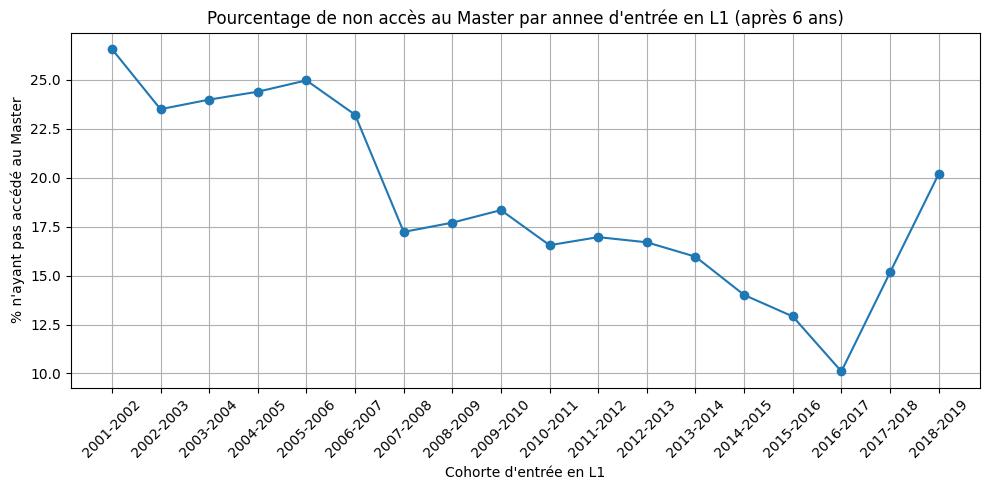

In [23]:
niveaux_finaux = ['M1', 'M2', '5A', 'Master', 'Doctorat', 'D', '6A', '7A', '8A', '9A', '10A', '11A', '12A']

# 1. Trouver la première inscription en L1 pour chaque étudiant
df_l1 = df_total[df_total['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False)]
premiere_l1 = df_l1.groupby('NUMERO')['ANNEE_UNIVERSITAIRE'].min().reset_index()
premiere_l1 = premiere_l1.rename(columns={'ANNEE_UNIVERSITAIRE': 'ANNEE_L1'})

# 2. Ajouter cette info au dernier passage de chaque étudiant
dernier_passage = df_total.sort_values('ANNEE_UNIVERSITAIRE').groupby('NUMERO').tail(1)
dernier_passage = dernier_passage.merge(premiere_l1, on='NUMERO', how='left')

# 3. Calculer le nombre d'années écoulées depuis la L1
dernier_passage['ANNEE_L1_NUM'] = dernier_passage['ANNEE_L1'].str[:4].astype(float)
dernier_passage['ANNEE_DERNIERE'] = dernier_passage['ANNEE_UNIVERSITAIRE'].str[:4].astype(float)
dernier_passage['ANNEES_ECOULEES'] = dernier_passage['ANNEE_DERNIERE'] - dernier_passage['ANNEE_L1_NUM']

# 4. Pour chaque cohorte d'entrée (année de L1)
resultats = []
for annee_cohorte in sorted(premiere_l1['ANNEE_L1'].dropna().unique()):
    annee_num = float(annee_cohorte[:4])
    # Sélectionner les étudiants de cette cohorte
    cohort = dernier_passage[dernier_passage['ANNEE_L1'] == annee_cohorte]
    # Garder seulement ceux qui ont eu au moins entre 3 et 6 ans d'études
    cohort = cohort[cohort['ANNEES_ECOULEES'] >= 6]
    if len(cohort) == 0:
        continue
    # Compter ceux qui n'ont pas atteint M1 ou plus
    non_master = cohort[~cohort['NIVEAU LMD ET NON LMD'].str.contains('|'.join(niveaux_finaux), na=False)]
    nb_total = cohort['NUMERO'].nunique()
    nb_non_master = non_master['NUMERO'].nunique()
    pourcentage_non_master = 100 * nb_non_master / nb_total if nb_total > 0 else 0
    resultats.append({
        'Cohorte_L1': annee_cohorte,
        'Nb_total': nb_total,
        'Nb_non_master': nb_non_master,
        'Pourcentage_non_master': pourcentage_non_master
    })

# 5. Afficher le tableau récapitulatif
df_resultats = pd.DataFrame(resultats)
print(df_resultats)

# 6. Visualisation (optionnelle)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df_resultats['Cohorte_L1'], df_resultats['Pourcentage_non_master'], marker='o')
plt.title("Pourcentage de non accès au Master par annee d'entrée en L1 (après 6 ans)")
plt.xlabel("Cohorte d'entrée en L1")
plt.ylabel("% n'ayant pas accédé au Master")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()
# ...existing code...

La part d'étudiants n'atteignant pas le Master après 6 ans a fortement diminué à l'UCAD au fil des promotions, ce qui traduit une amélioration globale de la réussite et de la progression académique.

#### évolution des effectifs par formation

objetif : nous analysons l’évolution des inscriptions par filière et département sur les 25 dernières années

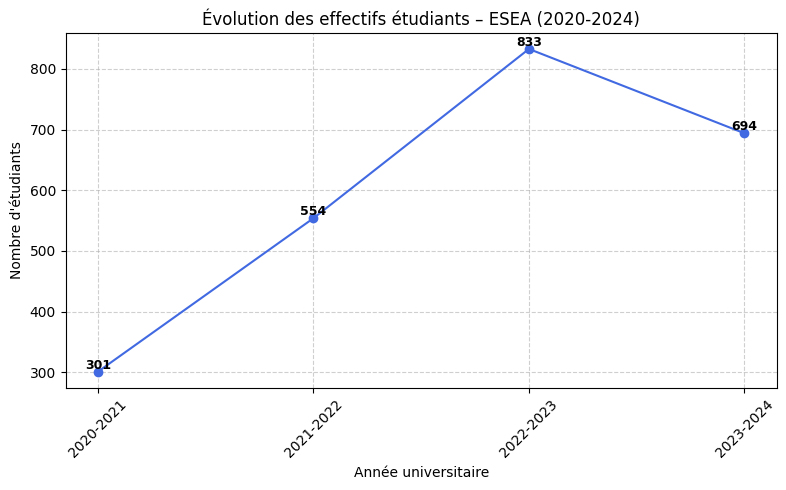

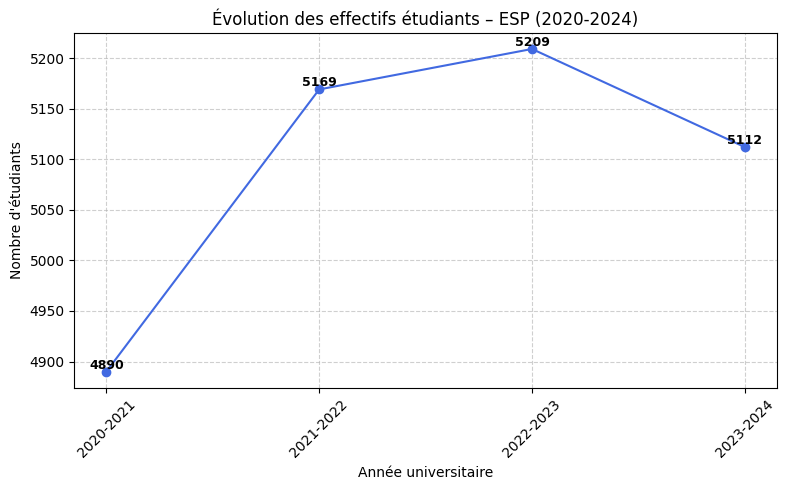

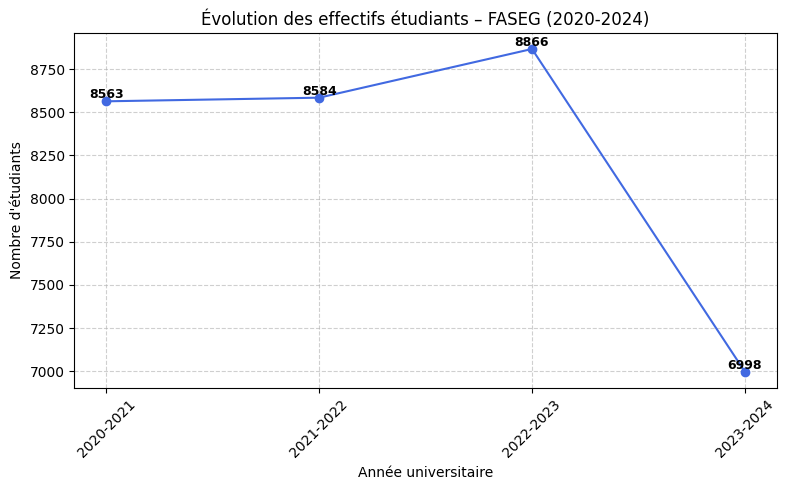

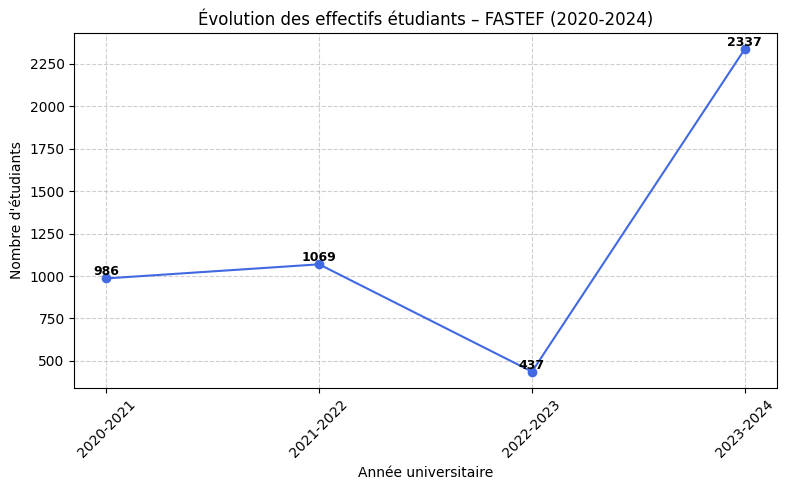

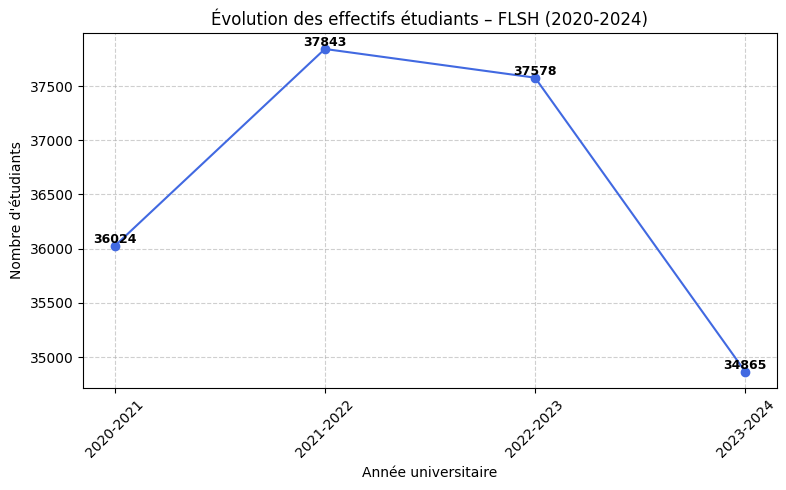

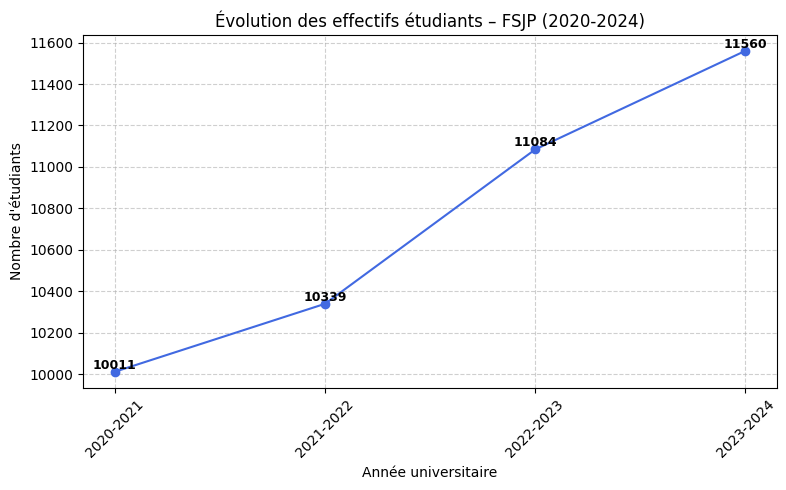

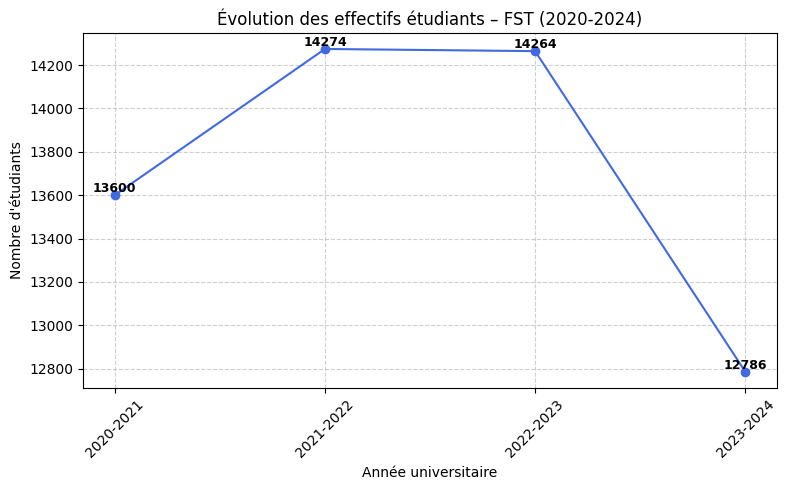

In [24]:
# === Évolution des effectifs par faculté à l'UCAD (2020-2024) ===

import matplotlib.pyplot as plt

# Liste des codes des facultés principales
etablissement_code = ['FST', 'FLSH', 'FASEG', 'FMPOS', 'FASTEF', 'FSJP', 'ESP', 'ESEA']

# Filtrer sur les années récentes et les facultés
annees_etude = [ '2020-2021', '2021-2022', '2022-2023', '2023-2024']
df_2020_2024 = df_total[
    (df_total['ETABLISSMENT_CODE'].isin(etablissement_code)) &
    (df_total['ANNEE_UNIVERSITAIRE'].isin(annees_etude))
]

# Compter le nombre d'étudiants par faculté et par année universitaire
effectifs_par_formation = (
    df_2020_2024
    .groupby(['ANNEE_UNIVERSITAIRE', 'ETABLISSMENT_CODE'])['NUMERO']
    .count()
    .reset_index()
    .rename(columns={'NUMERO': "Effectif"})
)

# Visualiser l'évolution des effectifs pour chaque faculté
facultes = effectifs_par_formation['ETABLISSMENT_CODE'].unique()

for fac in facultes:
    data_fac = effectifs_par_formation[effectifs_par_formation['ETABLISSMENT_CODE'] == fac]
    plt.figure(figsize=(8, 5))
    plt.plot(data_fac['ANNEE_UNIVERSITAIRE'], data_fac['Effectif'], marker='o', color='royalblue')
    # Afficher les valeurs sur le graphe
    for i, val in enumerate(data_fac['Effectif']):
        plt.text(data_fac['ANNEE_UNIVERSITAIRE'].iloc[i], val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.title(f"Évolution des effectifs étudiants – {fac} (2020-2024)")
    plt.xlabel("Année universitaire")
    plt.ylabel("Nombre d'étudiants")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#### Évolution temporelle des inscriptions 

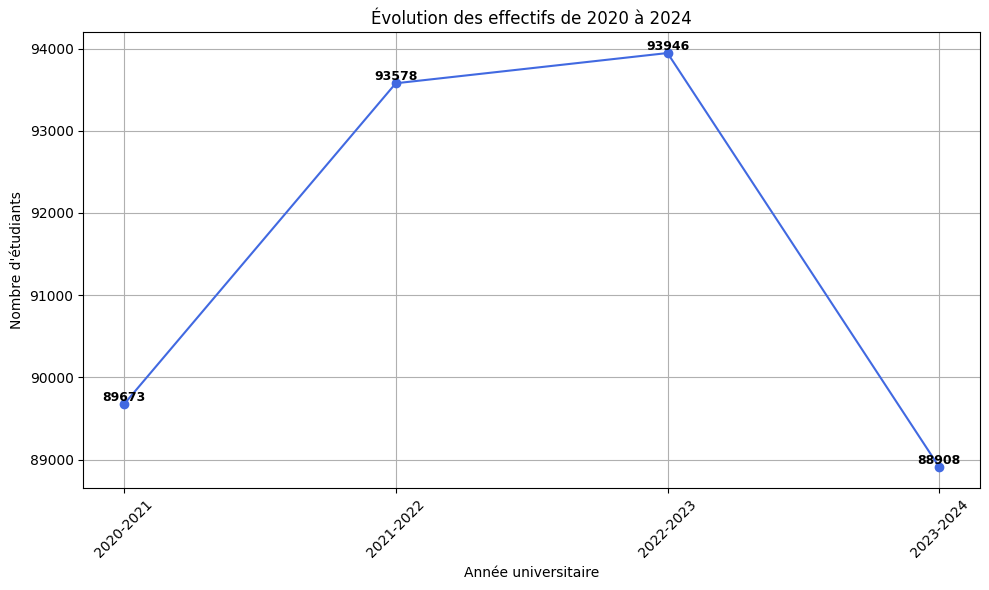

In [25]:
#===evolution des effectifs  de 2020 a 2024 ==========
df_2020_2024 = df_total[df_total['ANNEE_UNIVERSITAIRE'].isin(['2020-2021', '2021-2022', '2022-2023', '2023-2024'])]
# Compter le nombre d'étudiants de 2020 à 2024
effectifs = df_2020_2024.groupby('ANNEE_UNIVERSITAIRE')['NUMERO'].count().reset_index()
# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(effectifs['ANNEE_UNIVERSITAIRE'], effectifs['NUMERO'], marker='o', color='royalblue')
for i, val in enumerate(effectifs['NUMERO']):
    plt.text(effectifs['ANNEE_UNIVERSITAIRE'].iloc[i], val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("Évolution des effectifs de 2020 à 2024")
plt.xlabel("Année universitaire")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show() 


#### Corrélation entre série Bac  mention finale(test du chi2)

0.0
Il y a une association significative entre la série de Bac et la mention du Bac car p < 0.05.


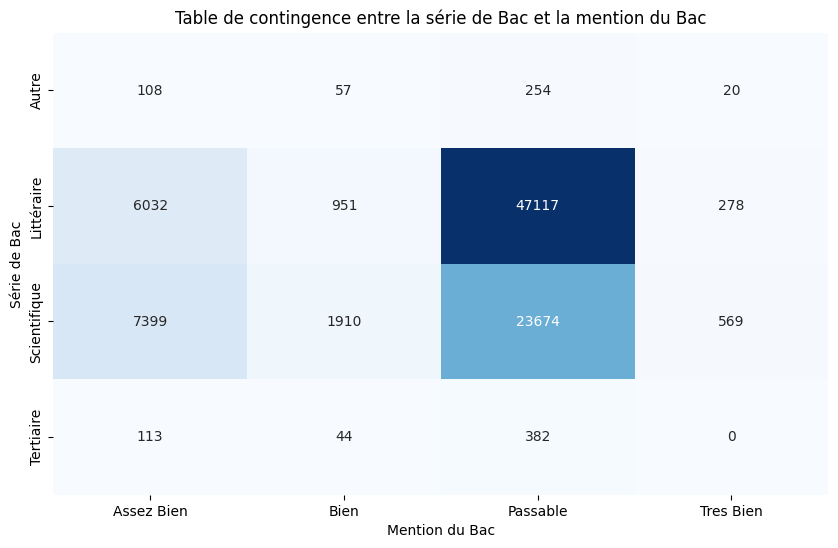

In [26]:
#===evolution des effectifs  de 2001 a 2024 ==========
#test du chi2 entre seri de bac et mention du bac 

test = pd.crosstab(df_2023['BAC_TYPE'], df_2023['MENTION_BAC_NORM'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(test)
print(p)
if p < 0.05:
    print("Il y a une association significative entre la série de Bac et la mention du Bac car p < 0.05.")
else: 
    print("Il n'y a pas d'association significative entre la série de Bac et la mention du Bac.") 
    
#table de contingence
table_contingence = pd.crosstab(df_2023['BAC_TYPE'], df_2023['MENTION_BAC_NORM'])
#visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(table_contingence, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Table de contingence entre la série de Bac et la mention du Bac")
plt.xlabel("Mention du Bac")
plt.ylabel("Série de Bac")
plt.show() 



#### Impact du délai Bac-Université sur la réussite académique

In [27]:
#prendre les etudiants en l1 en 2017-2018 
df_2017_2018 = df_total[df_total['ANNEE_UNIVERSITAIRE'] == '2017-2018'] 
df_2017_2018_L1 = df_2017_2018[df_2017_2018['NIVEAU LMD'] == 'L1']
df_2017_2018_L1.head()



,NUMERO,NUMERO_TABLE,INE,NUMERO_IDENTITIFICATION,NOM,PRENOM,DATE_DE_NAISSANCE,LIEU_DE_NAISSANCE,MAIL_INSTITUTIONNEL,SEXE,MENTION_BACC,ANNEE_BACC,PAYS_DE_NAISSANCE,NATIONALITE,SERIE_BACC,REGION_DE_NAISSANCE,ETABLISSMENT_CODE,ETABLISSEMENT,NIVEAU_SECTION,SIGLE_NIVEAU_SECTION,COHORTE,ETAT_INSCRIPTION,ANNEE_INSCRIPTION,ANNEE_UNIVERSITAIRE,TYPE_FORMATION,CODE_NIVEAU,NIVEAU,DATE_INSCRIPTION,NIVEAU LMD,NIVEAU LMD ET NON LMD,SYSTEME,DEPARTEMENT FORMATION,source,AGE_INSCRIPTION,MENTION_BAC_NORM,BAC_TYPE
960319,.19950048N,NaN,NaN,.1212197100346,NGOM,Jacob Sêq,1971-02-03,DIOURBEL,jacobseq.ngom@ucad.edu.sn,M,PA,1993.0,Sénégal,Sénégalaise,A3,Diourbel,FSJP,Faculté des Sciences Juridiques et Politiques,Licence 1 Sciences Juridiques,Licence 1 Sciences Juridiques,A,Inscrit(e),2018,2017-2018,I,1,Première Année,2018-01-18,L1,L1,LMD,Droit Privé,Liste_globale_des_etudiants_tous_les_champs201...,46.0,Passable,Littéraire
960328,.200201HWU,NaN,NaN,.1598199200123,NGOM,Ibrahima,1981-02-06,NDIANDIAYE,ibrahima57.ngom@ucad.edu.sn,M,PA,2002.0,Sénégal,Sénégalaise,L'1,Thiès,FASTEF,Faculté des Sciences et Technologies de l'Educ...,Première Année du CAE-CEM en Lettres Histoire ...,F1C1 Lettres Histoire Géographie(FAD),NaN,Inscrit(e),2018,2017-2018,I,1,Première Année,2017-12-08,L1,L1,LMD,Histoire-Géographie,Liste_globale_des_etudiants_tous_les_champs201...,36.0,Passable,Littéraire
960353,.200602PH1,NaN,NaN,.2070198400529,NDIAYE,Siré,NaT,ZIGUINCHOR,sire3.ndiaye@ucad.edu.sn,F,PA,2006.0,Sénégal,Sénégalaise,L'1,Ziguinchor,FASTEF,Faculté des Sciences et Technologies de l'Educ...,Première Année du CAE-CEM en Lettres Histoire ...,F1C1 Lettres Histoire Géographie(FAD),NaN,Inscrit(e),2018,2017-2018,I,1,Première Année,2017-11-03,L1,L1,LMD,Histoire-Géographie,Liste_globale_des_etudiants_tous_les_champs201...,NaN,Passable,Littéraire
960357,.2007032N5,NaN,NaN,.1392198400987,CISSE,Amadou Tidiane,NaT,TAMBACOUNDA,amadoutidiane1.cisse@ucad.edu.sn,M,PA,2007.0,Sénégal,Sénégalaise,L'1,Tambacounda,FSJP,Faculté des Sciences Juridiques et Politiques,Licence 1 Sciences Juridiques(2)(FAD),Licence 1 Sciences Juridiques(2)(FAD),NaN,Inscrit(e),2018,2017-2018,C,1,Première Année,2018-01-29,L1,L1,LMD,Institut des Métiers du Droit,Liste_globale_des_etudiants_tous_les_champs201...,NaN,Passable,Littéraire
960534,.201305RH5,NaN,N07001820131,.1564200100478,DIAW,Aboubacar,NaT,NIORO DU RIP,aboubacar2.diaw@ucad.edu.sn,M,PA,2013.0,Sénégal,Sénégalaise,L2,Kaolack,ENSETP,Ecole Normale Supérieure d'Enseignement Techni...,Licence 1 Banque - Assurance,Licence 1 Banque - Assurance,NaN,Inscrit(e),2018,2017-2018,C,1,Première Année,2018-03-06,L1,L1,LMD,Techniques économique et gestion,Liste_globale_des_etudiants_tous_les_champs201...,NaN,Passable,Littéraire


In [28]:
df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["ANNEE_INSCRIPTION"] - df_2017_2018_L1["ANNEE_BACC"]
df_2017_2018_L1["delai_bac_univ"].describe() 

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2134977254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["ANNEE_INSCRIPTION"] - df_2017_2018_L1["ANNEE_BACC"]


count    21693.000000
mean         1.557553
std         18.508668
min         -4.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1923.000000
Name: delai_bac_univ, dtype: float64

In [29]:
#======filter =============
code_niveau_mapping = {
    'L1': 1,
    'L2': 2,
    'L3': 3,
    'M1': 4,
    'M2': 5,
}
df_2017_2018_L1['CODE_NIVEAU'] = df_2017_2018_L1['NIVEAU LMD'].map(code_niveau_mapping)
df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["delai_bac_univ"].astype(int)
df_2017_2018_L1 = df_2017_2018_L1[df_2017_2018_L1["delai_bac_univ"] > 0]
df_2017_2018_L1 = df_2017_2018_L1[df_2017_2018_L1["delai_bac_univ"] < 10]
df_2017_2018_L1["delai_bac_univ"].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2154161684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1['CODE_NIVEAU'] = df_2017_2018_L1['NIVEAU LMD'].map(code_niveau_mapping)
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2154161684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["delai_bac_univ"].astype(int)


count    21544.000000
mean         1.276597
std          0.563918
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: delai_bac_univ, dtype: float64

objectif : L'objectif de cette analyse est de détecter à partir de quelle année universitaire les inscriptions dans les universités ont commencé à être significativement décalées dans le temps

       NUMERO DATE_INSCRIPTION
0  .199900UB6       2001-12-11
1  .199800OAE       2001-12-12
2  .199700H5O       2001-11-10
3  .199700I36       2002-02-01
4  .199800NC9       2001-11-19
5  .199900TPD       2002-03-07
6  .199900TZS       2001-12-04
7  .199900U28       2001-11-14
8  .1995000ZR       2002-01-17
9  .19950009W       2001-12-04


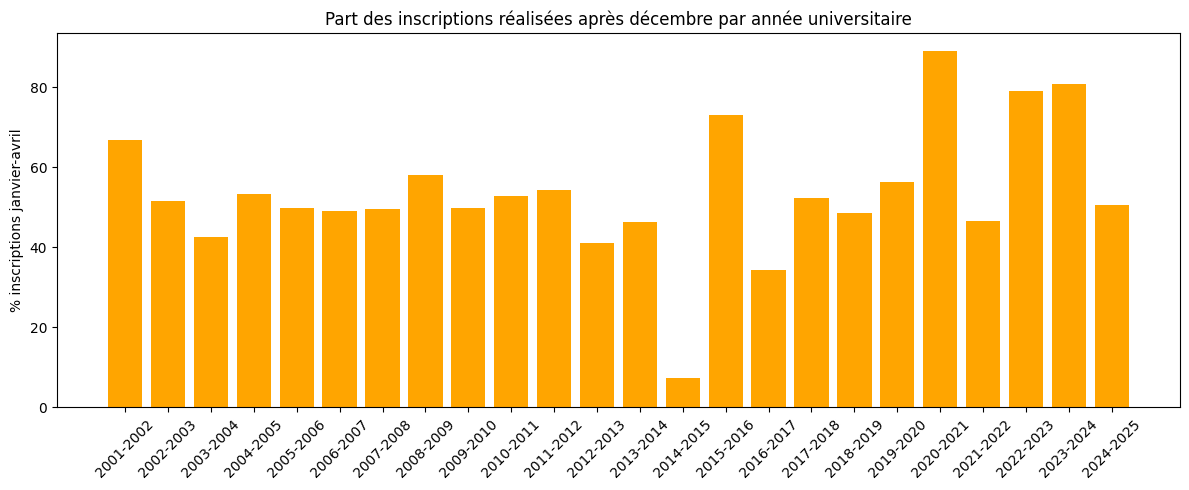

Empty DataFrame
Columns: [DATE_INSCRIPTION, source, NUMERO, NOM, PRENOM]
Index: []


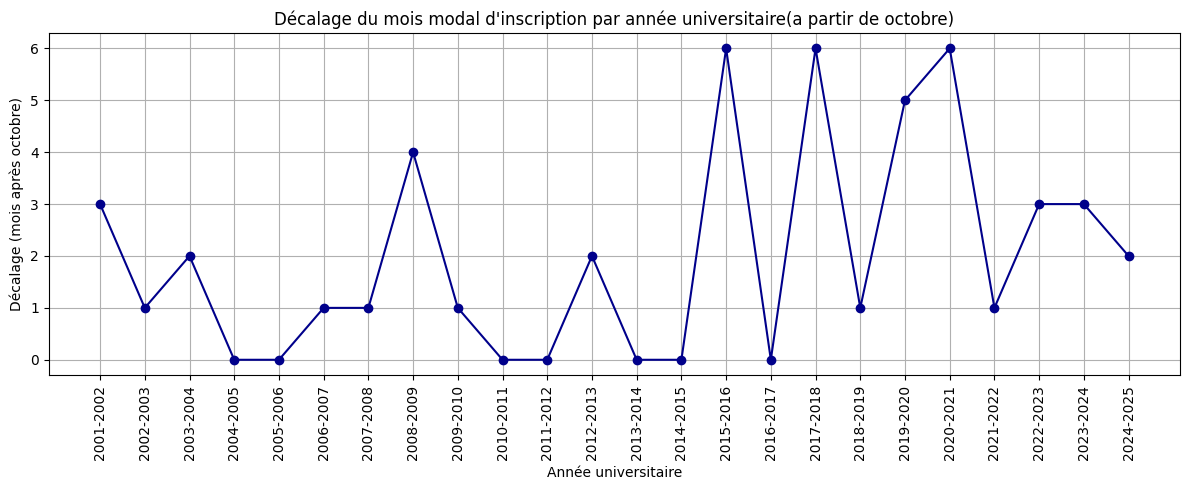

In [30]:


# Conversion correcte juste après la concaténation !
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], dayfirst=True, errors='coerce')
print(df_total[['NUMERO', 'DATE_INSCRIPTION']].head(10))

# Ne garder que les années universitaires plausibles (ex: >= 2000)
annee_min = 2000
df_total = df_total[df_total['DATE_INSCRIPTION'].dt.year >= annee_min]

# Définir l'année universitaire selon la logique UCAD
def get_annee_universitaire(date):
    if pd.isnull(date):
        return None
    if date.month >= 10:  # Octobre à Décembre
        return f"{date.year}-{date.year + 1}"
    elif 1 <= date.month <= 4:  # Janvier à Avril (retard sur l'année précédente)
        return f"{date.year - 1}-{date.year}"
    else:  # Mai à Septembre : inscription trop tardive ou anomalie
        return None

df_total['ANNEE_UNIVERSITAIRE'] = df_total['DATE_INSCRIPTION'].apply(get_annee_universitaire)
df_total = df_total.dropna(subset=['ANNEE_UNIVERSITAIRE'])

# On ne garde que les inscriptions d'octobre à avril (période normale)
df_total = df_total[df_total['DATE_INSCRIPTION'].dt.day.isin([10,11,12,1,2,3,4])]

# Pourcentage d'inscriptions après décembre (janvier à avril) pour chaque année universitaire
df_total['MOIS_INSCRIPTION'] = df_total['DATE_INSCRIPTION'].dt.day
annees = sorted(df_total['ANNEE_UNIVERSITAIRE'].unique())
pourcentages = []
for annee in annees:
    total = len(df_total[df_total['ANNEE_UNIVERSITAIRE'] == annee])
    apres_dec = len(df_total[(df_total['ANNEE_UNIVERSITAIRE'] == annee) & (df_total['MOIS_INSCRIPTION'].isin([1,2,3,4]))])
    pct = 100 * apres_dec / total if total > 0 else 0
    pourcentages.append(pct)

plt.figure(figsize=(12, 5))
plt.bar(annees, pourcentages, color='orange')
plt.xticks(rotation=45)
plt.ylabel("% inscriptions janvier-avril")
plt.title("Part des inscriptions réalisées après décembre par année universitaire")
plt.tight_layout()
plt.show()

# Décalage du mois modal d'inscription
mois_mode_par_annee = (
    df_total.groupby('ANNEE_UNIVERSITAIRE')['DATE_INSCRIPTION']
    .agg(lambda x: x.dt.day.mode().iloc[0])
    .reset_index()
)
mois_mode_par_annee = mois_mode_par_annee.rename(columns={'DATE_INSCRIPTION': 'MOIS_MODAL'})

def decalage_depuis_octobre(mois_modal):
    if mois_modal >= 10:
        return mois_modal - 10 
    else:
        return mois_modal + 2  # Janvier=1 => 3 mois après octobre

mois_mode_par_annee['DECALAGE_MOIS'] = mois_mode_par_annee['MOIS_MODAL'].apply(decalage_depuis_octobre)
df_avril = df_total[df_total['DATE_INSCRIPTION'].dt.year == 4][['DATE_INSCRIPTION', 'source', 'NUMERO', 'NOM', 'PRENOM']]
print(df_avril.head(20))

plt.figure(figsize=(12, 5))
plt.plot(mois_mode_par_annee['ANNEE_UNIVERSITAIRE'], mois_mode_par_annee['DECALAGE_MOIS'], marker='o', color='darkblue')
plt.title("Décalage du mois modal d'inscription par année universitaire(a partir de octobre)")
plt.xlabel("Année universitaire")
plt.ylabel("Décalage (mois après octobre)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



L'analyse montre que le décalage des inscriptions universitaires à l'UCAD est devenu significatif à partir de certaines années, avec une part importante d’étudiants s’inscrivant après décembre jusqu'à janvier, février, voire plus tard

#### chamgement de filiere

In [31]:
#detecter les etudiants qui chage de formation
# Détecter les étudiants qui changent de formation (département) au cours de leur parcours

# 1. Trier les données par étudiant et par année universitaire
df_total_sorted = df_total.sort_values(['NUMERO', 'ANNEE_UNIVERSITAIRE'])

# 2. Pour chaque étudiant, comparer le département d'une année à l'autre
df_total_sorted['CHANGEMENT_FORMATION'] = (
    df_total_sorted.groupby('NUMERO')['DEPARTEMENT FORMATION']
    .transform(lambda x: x != x.shift())
)

# 3. Un étudiant a changé de formation s'il a au moins deux départements différents
changement_etudiants = (
    df_total.groupby('NUMERO')['DEPARTEMENT FORMATION']
    .nunique()
    .reset_index(name='NB_FORMATIONS')
)
changement_etudiants['A_CHANGE_FORMATION'] = (changement_etudiants['NB_FORMATIONS'] > 1).astype(int)

# 4. Pourcentage d'étudiants ayant changé de formation
pourcentage_changement = 100 * changement_etudiants['A_CHANGE_FORMATION'].mean()
print(f"Pourcentage d'étudiants ayant changé de formation : {pourcentage_changement:.2f}%")

# 5. (Optionnel) Lister les étudiants concernés
etudiants_ayant_change = changement_etudiants[changement_etudiants['A_CHANGE_FORMATION'] == 1]



Pourcentage d'étudiants ayant changé de formation : 6.87%


Répartition par sexe :
SEXE
M    68.4%
F    31.6%
Name: proportion, dtype: object

Répartition par mention au Bac :
MENTION_BACC
PA    86.5%
AB     9.9%
BI     2.9%
TB     0.6%
Name: proportion, dtype: object

Répartition par type de Bac :
BAC_TYPE
Scientifique    50.7%
Littéraire      45.5%
Tertiaire        2.4%
Autre            1.3%
Name: proportion, dtype: object

Répartition par tranche d'âge à l'inscription :
TRANCHE_AGE
27-30    35.4%
24-26    29.3%
31-40    19.9%
21-23    11.3%
40+       3.4%
18-20     0.7%
<18       0.0%
Name: proportion, dtype: object

Répartition par région de naissance (top 5) :
REGION_DE_NAISSANCE
Dakar         36.0%
Thiès         15.5%
Kaolack        9.8%
Ziguinchor     7.1%
Fatick         7.1%
Name: proportion, dtype: object

Comparaison avec la population totale (sexe) :
SEXE
M    63.1%
F    36.9%
Name: proportion, dtype: object


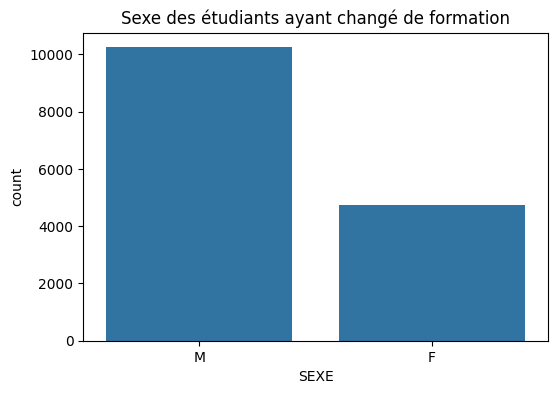

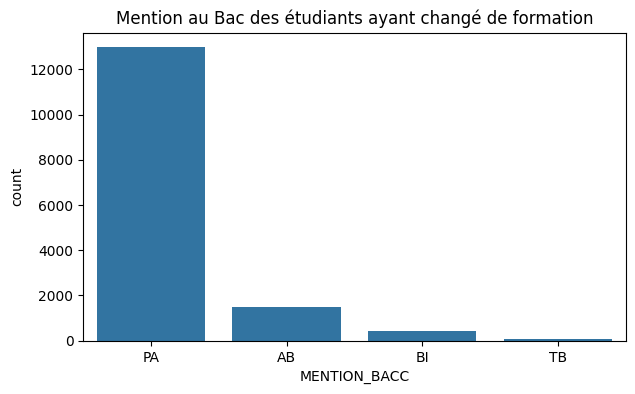

In [32]:
# Analyse approfondie : Profil des étudiants qui changent de formation

# 1. Récupérer les NUMERO des étudiants ayant changé de formation
etudiants_ayant_change_ids = etudiants_ayant_change['NUMERO']

# 2. Extraire leurs informations démographiques et académiques (dernière inscription connue)
profil_changement = df_total[df_total['NUMERO'].isin(etudiants_ayant_change_ids)]
profil_changement_last = profil_changement.sort_values('ANNEE_UNIVERSITAIRE').groupby('NUMERO').tail(1)

# 3. Statistiques descriptives sur ce sous-groupe
print("Répartition par sexe :")
print(profil_changement_last['SEXE'].value_counts(normalize=True).map("{:.1%}".format))

print("\nRépartition par mention au Bac :")
print(profil_changement_last['MENTION_BACC'].value_counts(normalize=True).map("{:.1%}".format))

print("\nRépartition par type de Bac :")
if 'BAC_TYPE' in profil_changement_last.columns:
    print(profil_changement_last['BAC_TYPE'].value_counts(normalize=True).map("{:.1%}".format))
else:
    print(profil_changement_last['SERIE_BACC'].value_counts(normalize=True).map("{:.1%}".format))

print("\nRépartition par tranche d'âge à l'inscription :")
if 'AGE_INSCRIPTION' in profil_changement_last.columns:
    bins = [0, 17, 20, 23, 26, 30, 40, 100]
    labels = ['<18', '18-20', '21-23', '24-26', '27-30', '31-40', '40+']
    profil_changement_last['TRANCHE_AGE'] = pd.cut(profil_changement_last['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)
    print(profil_changement_last['TRANCHE_AGE'].value_counts(normalize=True).map("{:.1%}".format))

print("\nRépartition par région de naissance (top 5) :")
print(profil_changement_last['REGION_DE_NAISSANCE'].value_counts(normalize=True).head(5).map("{:.1%}".format))

# 4. Comparaison avec la population totale
print("\nComparaison avec la population totale (sexe) :")
print(df_total['SEXE'].value_counts(normalize=True).map("{:.1%}".format))


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=profil_changement_last, x='SEXE')
plt.title("Sexe des étudiants ayant changé de formation")
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(data=profil_changement_last, x='MENTION_BACC', order=['PA','AB','BI','TB'])
plt.title("Mention au Bac des étudiants ayant changé de formation")
plt.show()

#### suivre cohorte


In [33]:
import pandas as pd
resultats = pd.read_csv("C:/Users/HP/Downloads/df_inscrit_resultat.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2318457313.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  resultats = pd.read_csv("C:/Users/HP/Downloads/df_inscrit_resultat.csv")


In [34]:
resultats.head( )

,NUMERO,NOM,PRENOM,DATE_DE_NAISSANCE,LIEU_DE_NAISSANCE,SEXE,MENTION_BACC,ANNEE_BACC,NATIONALITE,SERIE_BACC,ETABLISSMENT_CODE,ETABLISSEMENT,NIVEAU_SECTION,SIGLE_NIVEAU_SECTION,ETAT_INSCRIPTION,ANNEE_INSCRIPTION,ANNEE UNIVERSITAIRE,TYPE_FORMATION,CODE_NIVEAU,NIVEAU,DATE_INSCRIPTION,NIVEAU LMD,NIVEAU LMD ET NON LMD,SYSTEME,DEPARTEMENT FORMATION,CREDIT,SESSION,MENTION,MOYENNE ANNUELLE,RESULTAT
0,19950018H,NIANG,Papa Massal,13/04/1968,TAMBACOUMBA,M,PA,1990.0,Sénégalaise,NaN,FASTEF,Faculté des Sciences et Technologies de l'Educ...,Certificat d'Aptitude à l'Enseignement Moyen,Certificat d'Aptitude à l'Enseignement Moyen,Inscrit(e),2011,2010-2011,I,3,Troisième Année,29/12/2010,NaN,3A,Classique,...,NaN,NaN,NaN,NaN,NaN
1,199700AUY,GASSAMA,Fatou,26/12/1977,DAKAR,F,PA,1995.0,Sénégalaise,D,FMPO,"Faculté de Médecine, de Pharmacie et d?Odonto-...",Troisième Cycle des Etudes Médicales (Thèse),Troisième Cycle des Etudes Médicales (Thèse),Inscrit(e),2011,2010-2011,I,8,Huitième année,28/12/2010,NaN,8A,Classique,Médecine interne et Spécialités médicales,NaN,NaN,NaN,NaN,NaN
2,199900QF3,NGOM,Mamadou,21/03/1977,DAKAR,M,PA,1999.0,Sénégalaise,L2,FASTEF,Faculté des Sciences et Technologies de l'Educ...,Certificat d'Aptitude à l'Enseignement Moyen,Certificat d'Aptitude à l'Enseignement Moyen,Inscrit(e),2011,2010-2011,I,3,Troisième Année,23/12/2010,NaN,3A,Classique,...,NaN,NaN,NaN,NaN,NaN
3,199900RLX,SANE,Pape Ibrahima,17/04/1979,ZIGUINCHOR,M,PA,1999.0,Sénégalaise,S2,FMPO,"Faculté de Médecine, de Pharmacie et d?Odonto-...",Quatrième Année du Deuxième Cycle des Etudes M...,Quatrième Année du Deuxième Cycle des Etudes M...,Inscrit(e),2011,2010-2011,I,6,Sixième Année,04/12/2010,M2,M2,LMD,Médecine interne et Spécialités médicales,NaN,NaN,NaN,NaN,NaN
4,199900RMH,LEYE,Mamadou Makhtar Mbacké,12/01/1980,BAMBEY,M,PA,1999.0,Sénégalaise,S2,FMPO,"Faculté de Médecine, de Pharmacie et d?Odonto-...",Troisième Cycle des Etudes Médicales (Thèse),Troisième Cycle des Etudes Médicales (Thèse),Inscrit(e),2011,2010-2011,I,8,Huitième année,24/11/2010,NaN,8A,Classique,Médecine interne et Spécialités médicales,NaN,NaN,NaN,NaN,NaN


In [35]:
resultats.isnull().sum()

NUMERO                        0
NOM                           0
PRENOM                        0
DATE_DE_NAISSANCE             0
LIEU_DE_NAISSANCE           241
SEXE                          0
MENTION_BACC               6303
ANNEE_BACC                 4946
NATIONALITE                   0
SERIE_BACC                32312
ETABLISSMENT_CODE             0
ETABLISSEMENT                 0
NIVEAU_SECTION                0
SIGLE_NIVEAU_SECTION          0
ETAT_INSCRIPTION              0
ANNEE_INSCRIPTION             0
ANNEE UNIVERSITAIRE           0
TYPE_FORMATION                0
CODE_NIVEAU                   0
NIVEAU                        0
DATE_INSCRIPTION              0
NIVEAU LMD               193218
NIVEAU LMD ET NON LMD         0
SYSTEME                       0
DEPARTEMENT FORMATION         0
CREDIT                   495157
SESSION                  465639
MENTION                  926097
MOYENNE ANNUELLE         505947
RESULTAT                 465639
dtype: int64

In [36]:
#remplacer les non null par abadon 
resultats['RESULTAT'] = resultats['RESULTAT'].fillna('ABANDON')
resultats['RESULTAT'].value_counts()

RESULTAT
ABANDON                          465639
Redouble                         266958
Passe                            187522
Exclu                             87153
A obtenu le diplôme               67247
Autorisé à passer                 61993
Année validée                     41690
Année non validée                 35546
Autorisé à faire la session 2      2034
En attente de délibération           55
Name: count, dtype: int64

In [37]:
resultats.isnull().sum() / len(resultats) * 100

NUMERO                    0.000000
NOM                       0.000000
PRENOM                    0.000000
DATE_DE_NAISSANCE         0.000000
LIEU_DE_NAISSANCE         0.019822
SEXE                      0.000000
MENTION_BACC              0.518408
ANNEE_BACC                0.406798
NATIONALITE               0.000000
SERIE_BACC                2.657593
ETABLISSMENT_CODE         0.000000
ETABLISSEMENT             0.000000
NIVEAU_SECTION            0.000000
SIGLE_NIVEAU_SECTION      0.000000
ETAT_INSCRIPTION          0.000000
ANNEE_INSCRIPTION         0.000000
ANNEE UNIVERSITAIRE       0.000000
TYPE_FORMATION            0.000000
CODE_NIVEAU               0.000000
NIVEAU                    0.000000
DATE_INSCRIPTION          0.000000
NIVEAU LMD               15.891768
NIVEAU LMD ET NON LMD     0.000000
SYSTEME                   0.000000
DEPARTEMENT FORMATION     0.000000
CREDIT                   40.725607
SESSION                  38.297815
MENTION                  76.169503
MOYENNE ANNUELLE    

In [38]:
resultats['RESULTAT'].value_counts(normalize=True).map("{:.1%}".format)

RESULTAT
ABANDON                          38.3%
Redouble                         22.0%
Passe                            15.4%
Exclu                             7.2%
A obtenu le diplôme               5.5%
Autorisé à passer                 5.1%
Année validée                     3.4%
Année non validée                 2.9%
Autorisé à faire la session 2     0.2%
En attente de délibération        0.0%
Name: proportion, dtype: object

In [39]:
resultats["SERIE_BACC"].value_counts(normalize=True).map("{:.1%}".format)

SERIE_BACC
S2       30.1%
L2       30.1%
L'1      27.5%
G         3.0%
D         1.9%
LAR       1.8%
S1        1.3%
S         0.9%
STEG      0.7%
C         0.6%
A3        0.4%
A         0.4%
LA        0.3%
S3        0.2%
A4        0.1%
L'        0.1%
S2A       0.1%
B         0.1%
L1A       0.1%
T1        0.1%
a3        0.0%
SNA       0.0%
SB        0.0%
SNB       0.0%
A2        0.0%
L1B       0.0%
G2        0.0%
T2        0.0%
L         0.0%
SM        0.0%
ES        0.0%
BT        0.0%
E         0.0%
S4        0.0%
S5        0.0%
S1A       0.0%
F7        0.0%
T         0.0%
F6        0.0%
F2        0.0%
CAEP      0.0%
STIDD     0.0%
Name: proportion, dtype: object

In [43]:
resultats['RESULTAT'].unique()

array(['ABANDON', 'A obtenu le diplôme', 'Autorisé à faire la session 2',
       'Exclu', 'Redouble', 'Autorisé à passer', 'Passe', 'Année validée',
       'Année non validée', 'En attente de délibération'], dtype=object)

In [56]:
def suivi_cohorte(df, annee_bac, serie_bac, annee_univ, nb_annees=6):
    """
    Suivi d'une cohorte universitaire sur 6 ans.
    Prend en compte tous les cas de résultat, ne compte pas comme abandons ceux qui sont en session 2 ou en attente.
    Affiche et retourne la synthèse finale + le nombre de diplômés en 3, 4, 5, 6 ans.
    """
    import unidecode
    niveaux = ['L1', 'L2', 'L3']
    recap = []
    annee_diplome = {}  # Pour suivre l'année de diplomation par étudiant

    # Sélection initiale
    df_l1 = df[
        (df['ANNEE_BACC'] == annee_bac) &
        (df['SERIE_BACC'] == serie_bac) &
        (df['ANNEE UNIVERSITAIRE'] == annee_univ) &
        (df['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False))
    ]
    print(len(df_l1), "étudiants en L1 pour la cohorte", annee_bac, serie_bac, annee_univ)
    numeros_cohorte = set(df_l1['NUMERO'].unique())

    df_suivi = df[df['NUMERO'].isin(numeros_cohorte)].copy()
    df_suivi.set_index(['NUMERO', 'ANNEE UNIVERSITAIRE'], inplace=True)
    groupes = {('L1', 'début'): set(numeros_cohorte)}

    for i in range(nb_annees):
        annee_courante = f"{int(annee_univ[:4])+i}-{int(annee_univ[5:])+i}"
        nouveaux_groupes = {}
        for niveau in niveaux:
            for statut in ['début', 'redouble']:
                key = (niveau, statut)
                if key not in groupes or not groupes[key]:
                    continue
                groupe = groupes[key]
                passe, redouble, abandon, diplome = set(), set(), set(), set()
                for num in groupe:
                    idx = (num, annee_courante)
                    if idx not in df_suivi.index:
                        # Pas d'inscription = abandon/réorientation
                        abandon.add(num)
                        continue
                    etu = df_suivi.loc[idx]
                    if isinstance(etu, pd.DataFrame):
                        etu = etu.iloc[0]
                    res = str(etu['RESULTAT'])
                    res_clean = unidecode.unidecode(res).strip().upper()
                    
                    # Cas DIPLOME (en L3)
                    if niveau == 'L3' and ('A OBTENU LE DIPLOME' in res_clean or 'OBTENU' in res_clean):
                        diplome.add(num)
                        if num not in annee_diplome:
                            annee_diplome[num] = i + 1
                    # Cas ABANDON/EXCLU
                    elif res_clean in ['ABANDON', 'EXCLU']:
                        abandon.add(num)
                    # Cas REDOUBLEMENT
                    elif res_clean in ['REDOUBLE', 'ANNEE NON VALIDEE']:
                        nouveaux_groupes.setdefault((niveau, 'redouble'), set()).add(num)
                        redouble.add(num)
                    # Cas PASSAGE
                    elif res_clean in ['AUTORISE A PASSER', 'PASSE', 'ANNEE VALIDEE']:
                        if niveau == 'L1':
                            nouveaux_groupes.setdefault(('L2', 'début'), set()).add(num)
                        elif niveau == 'L2':
                            nouveaux_groupes.setdefault(('L3', 'début'), set()).add(num)
                        passe.add(num)
                    # Cas SESSION 2 / ATTENTE : l'étudiant reste dans le groupe pour l'année suivante
                    elif res_clean in ['AUTORISE A FAIRE LA SESSION 2', 'EN ATTENTE DE DELIBERATION']:
                        nouveaux_groupes.setdefault((niveau, statut), set()).add(num)
                        # Ni dans abandon, ni dans passe/redouble/diplome
                        continue
                    else:
                        # Cas non reconnu, prudence : abandon
                        abandon.add(num)

                nom_etape = niveau if statut == 'début' else f"{niveau} (redoublants)"
                recap.append({
                    'Année': annee_courante,
                    'Niveau': nom_etape,
                    'Passe': len(passe),
                    'Redouble': len(redouble),
                    'Abandon': len(abandon),
                    'Diplome': len(diplome) if niveau == 'L3' else 0.0
                })
        groupes = nouveaux_groupes
        if not groupes:
            break

    df_recap = pd.DataFrame(recap)

    # Calcul diplômés en 3, 4, 5, 6 ans
    nb_diplomes_3_ans = sum(1 for v in annee_diplome.values() if v == 3)
    nb_diplomes_4_ans = sum(1 for v in annee_diplome.values() if v == 4)
    nb_diplomes_5_ans = sum(1 for v in annee_diplome.values() if v == 5)
    nb_diplomes_6_ans = sum(1 for v in annee_diplome.values() if v == 6)

    print("\n**Synthèse de la cohorte** :")
    print(df_recap)
    print(f"\nCohorte {annee_bac} {serie_bac} ({annee_univ}) : {len(numeros_cohorte)} étudiants inscrits en L1")
    print(f"\nNombre de diplômés en 3 ans : {nb_diplomes_3_ans}")
    print(f"Nombre de diplômés en 4 ans : {nb_diplomes_4_ans}")
    print(f"Nombre de diplômés en 5 ans : {nb_diplomes_5_ans}")
    print(f"Nombre de diplômés en 6 ans : {nb_diplomes_6_ans}")

   


In [57]:
suivi_cohorte(resultats, 2018, 'L2', '2018-2019') 

6054 étudiants en L1 pour la cohorte 2018 L2 2018-2019


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\1609634710.py:38: PerformanceWarning: indexing past lexsort depth may impact performance.
  if idx not in df_suivi.index:
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\1609634710.py:42: PerformanceWarning: indexing past lexsort depth may impact performance.
  etu = df_suivi.loc[idx]



**Synthèse de la cohorte** :
        Année            Niveau  Passe  Redouble  Abandon  Diplome
0   2018-2019                L1   2403      3404      169      0.0
1   2019-2020  L1 (redoublants)   1027         3     2374      0.0
2   2019-2020                L2   1464       873       66      0.0
3   2020-2021  L1 (redoublants)      0         0        3      0.0
4   2020-2021                L2    420       546       61      0.0
5   2020-2021  L2 (redoublants)    387        47      439      0.0
6   2020-2021                L3    220       497       32    715.0
7   2021-2022  L2 (redoublants)    130        11      452      0.0
8   2021-2022                L3     95       422       48    242.0
9   2021-2022  L3 (redoublants)     39        25      268    165.0
10  2022-2023  L2 (redoublants)      0         0       11      0.0
11  2022-2023                L3      4        79       12     35.0
12  2022-2023  L3 (redoublants)     12        18      251    166.0
13  2023-2024  L3 (redoublants) 

In [72]:
resultats['DEPARTEMENT FORMATION'].value_counts()

DEPARTEMENT FORMATION
Droit Privé                                                                                             123267
Anglais                                                                                                 104960
Gestion                                                                                                 102810
Géographie                                                                                               88851
Physique                                                                                                 77403
                                                                                                         ...  
École Inter-Etats des Sciences et Médecine Vétérinaires                                                     26
Gouvernance et Administration des Etablissements d'Enseignement Supérieur et de Recherche ASupprimer        21
Laboratoire d'énergetique Appliquée                                                       

une autre version

In [76]:
def suivi_cohorte_versionII(df, annee_bac, serie_bac, annee_univ, 
                  faculte=None, departement=None, nb_annees=6):
    """
    Suivi d'une cohorte universitaire sur 6 ans, avec harmonisation des noms de faculté/département.
    """
    import unidecode

    # Harmonisation des colonnes faculte/departement 
    if 'c' in df.columns:
        df['FACULTE_CLEAN'] = df['DEPARTEMENT FORMATION'].fillna('').apply(
            lambda x: unidecode.unidecode(str(x)).strip().upper()
        )
    if 'DEPARTEMENT FORMATION' in df.columns:
        df['DEPARTEMENT_CLEAN'] = df['DEPARTEMENT FORMATION'].fillna('').apply(
            lambda x: unidecode.unidecode(str(x)).strip().upper()
        )
    
    # Harmonisation des paramètres 
    faculte_clean = unidecode.unidecode(str(faculte)).strip().upper() if faculte else None
    departement_clean = unidecode.unidecode(str(departement)).strip().upper() if departement else None

    # --- Filtrage initial cohorte ---
    masque = (
        (df['ANNEE_BACC'] == annee_bac) &
        (df['SERIE_BACC'] == serie_bac) &
        (df['ANNEE UNIVERSITAIRE'] == annee_univ) &
        (df['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False))
    )
    if faculte_clean and 'FACULTE_CLEAN' in df.columns:
        masque = masque & (df['FACULTE_CLEAN'] == faculte_clean)
    if departement_clean and 'DEPARTEMENT_CLEAN' in df.columns:
        masque = masque & (df['DEPARTEMENT_CLEAN'] == departement_clean)
    df_l1 = df[masque]
    

    if df_l1.empty:
        print(f"\033[91mAucun étudiant trouvé pour cette cohorte avec Faculté='{faculte}' et Département='{departement}'.\033[0m")
    
    print(len(df_l1), "étudiants en L1 pour la cohorte", annee_bac, serie_bac, annee_univ, 
          f"Faculté={faculte}" if faculte else "", 
          f"Département={departement}" if departement else "")

    numeros_cohorte = set(df_l1['NUMERO'].unique())
    df_suivi = df[df['NUMERO'].isin(numeros_cohorte)].copy()
    df_suivi.set_index(['NUMERO', 'ANNEE UNIVERSITAIRE'], inplace=True)
    groupes = {('L1', 'début'): set(numeros_cohorte)}
    recap = []
    annee_diplome = {}

    niveaux = ['L1', 'L2', 'L3']
    for i in range(nb_annees):
        annee_courante = f"{int(annee_univ[:4])+i}-{int(annee_univ[5:])+i}"
        nouveaux_groupes = {}
        for niveau in niveaux:
            for statut in ['début', 'redouble']:
                key = (niveau, statut)
                if key not in groupes or not groupes[key]:
                    continue
                groupe = groupes[key]
                passe, redouble, abandon, diplome = set(), set(), set(), set()
                for num in groupe:
                    idx = (num, annee_courante)
                    if idx not in df_suivi.index:
                        abandon.add(num)
                        continue
                    etu = df_suivi.loc[idx]
                    if isinstance(etu, pd.DataFrame):
                        etu = etu.iloc[0]
                    res = str(etu['RESULTAT'])
                    res_clean = unidecode.unidecode(res).strip().upper()
                    if niveau == 'L3' and ('A OBTENU LE DIPLOME' in res_clean or 'OBTENU' in res_clean):
                        diplome.add(num)
                        if num not in annee_diplome:
                            annee_diplome[num] = i + 1
                    elif res_clean in ['ABANDON', 'EXCLU']:
                        abandon.add(num)
                    elif res_clean in ['REDOUBLE', 'ANNEE NON VALIDEE']:
                        nouveaux_groupes.setdefault((niveau, 'redouble'), set()).add(num)
                        redouble.add(num)
                    elif res_clean in ['AUTORISE A PASSER', 'PASSE', 'ANNEE VALIDEE']:
                        if niveau == 'L1':
                            nouveaux_groupes.setdefault(('L2', 'début'), set()).add(num)
                        elif niveau == 'L2':
                            nouveaux_groupes.setdefault(('L3', 'début'), set()).add(num)
                        passe.add(num)
                    elif res_clean in ['AUTORISE A FAIRE LA SESSION 2', 'EN ATTENTE DE DELIBERATION']:
                        nouveaux_groupes.setdefault((niveau, statut), set()).add(num)
                        continue
                    else:
                        abandon.add(num)
                nom_etape = niveau if statut == 'début' else f"{niveau} (redoublants)"
                recap.append({
                    'Année': annee_courante,
                    'Niveau': nom_etape,
                    'Passe': len(passe),
                    'Redouble': len(redouble),
                    'Abandon': len(abandon),
                    'Diplome': len(diplome) if niveau == 'L3' else 0.0
                })
        groupes = nouveaux_groupes
        if not groupes:
            break

    df_recap = pd.DataFrame(recap)
    nb_diplomes_3_ans = sum(1 for v in annee_diplome.values() if v == 3)
    nb_diplomes_4_ans = sum(1 for v in annee_diplome.values() if v == 4)
    nb_diplomes_5_ans = sum(1 for v in annee_diplome.values() if v == 5)
    nb_diplomes_6_ans = sum(1 for v in annee_diplome.values() if v == 6)

    print("\n**Synthèse de la cohorte** :")
    print(df_recap)
    print(f"\nCohorte {annee_bac} {serie_bac} ({annee_univ}) : {len(numeros_cohorte)} étudiants inscrits en L1"
          + (f" | Faculté={faculte}" if faculte else "")
          + (f" | Département={departement}" if departement else ""))
    print(f"\nNombre de diplômés en 3 ans : {nb_diplomes_3_ans}")
    print(f"Nombre de diplômés en 4 ans : {nb_diplomes_4_ans}")
    print(f"Nombre de diplômés en 5 ans : {nb_diplomes_5_ans}")
    print(f"Nombre de diplômés en 6 ans : {nb_diplomes_6_ans}")

    

In [77]:
suivi_cohorte_versionII(resultats, 2018, 'L2', '2018-2019',
                       faculte='FSJP', departement='Droit Privé')

2274 étudiants en L1 pour la cohorte 2018 L2 2018-2019 Faculté=FSJP Département=Droit Privé


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\4048332058.py:63: PerformanceWarning: indexing past lexsort depth may impact performance.
  if idx not in df_suivi.index:
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\4048332058.py:66: PerformanceWarning: indexing past lexsort depth may impact performance.
  etu = df_suivi.loc[idx]



**Synthèse de la cohorte** :
        Année            Niveau  Passe  Redouble  Abandon  Diplome
0   2018-2019                L1    746      1525        0      0.0
1   2019-2020  L1 (redoublants)    406         1     1118      0.0
2   2019-2020                L2    268       469        9      0.0
3   2020-2021  L1 (redoublants)      0         0        1      0.0
4   2020-2021                L2    107       247       52      0.0
5   2020-2021  L2 (redoublants)    239        10      220      0.0
6   2020-2021                L3     39        99       10    120.0
7   2021-2022  L2 (redoublants)     47         4      206      0.0
8   2021-2022                L3     32       174       25    115.0
9   2021-2022  L3 (redoublants)     14         5       44     36.0
10  2022-2023  L2 (redoublants)      0         0        4      0.0
11  2022-2023                L3      0        30        2     15.0
12  2022-2023  L3 (redoublants)      1         0      113     65.0
13  2023-2024  L3 (redoublants) 

## Insights clés de l’analyse exploratoire

## Insights clés 

A partir des données étudiées,plusieurs enseignements majeurs ressortent :

1. **Profil démographique**  
   La répartition hommes/femmes est relativement équilibrée : **63,1 % d'hommes** et **36,9 % de femmes** sur l'ensemble des effectifs récents. L'age à l'inscription est concentré entre **21 et 26 ans** (près de 60 % des étudiants), avec un pic dans la tranche **21-23 ans**. Les inscriptions après 30 ans restent marginales (moins de 5 %).

2. **Redoublement et réussite**  
   Le **taux de redoublement en première année (L1)** atteint **37,1 %**. Concernant le taux d'abandon 
   lanalyse par cohorte montre une nette amélioration : la part d'étudiants n'ayant pas accédé au Master après 6 ans a fortement diminué au fil des promotions, passant de plus de **50 %** pour les cohortes du début des années 2000 à moins de **15 %** pour les cohortes récentes, traduisant ainsi une progression globale de la réussite académique.
   

3. **Facteurs influençant la réussite**  
   - **Mention au Bac** : Les étudiants ayant la mention "Passable" au Bac redoublent plus souvent (taux de redoublement en L1 supérieur à 40 %), contre moins de 20 % pour les mentions "Bien" ou "Très Bien".
   - **Série du Bac** : Les séries littéraires présentent un taux de redoublement en L1 de **44,2 %**, contre **33,7 %** pour les séries scientifiques.
   - **Région de naissance** : Certaines régions affichent un taux de redoublement supérieur à **50 %** comme Ziguichor , alors que d'autres sont en dessous de la moyenne 
   - **Sexe** : Aucune différence significative n’a été observée entre hommes et femmes concernant le redoublement en L1 (test du chi2, p-value > 0,05).

4. **Évolution des effectifs**  
   Les effectifs étudiants ont fortement augmenté, passant de **environ 30 000** en 2001 à un pic de **plus de 100 000** en 2022-2023, avant une baisse en 2024-2025. Certaines facultés (FST, FLSH, FASEG) concentrent la majorité des inscriptions.

5. **Inscription**  
   On observe un **décalage progressif des inscriptions** : la part d'étudiants s'inscrivant après décembre dépasse **30 %** certaines années récentes, alors qu'elle était moyenne avant 2010. Le mois modal d’inscription s'est déplacé de novembre à janvier/février pour plusieurs cohortes.

6. **Changement de formation**  
   **7,0 %** des étudiants changent de formation au cours de leur parcours. Parmi eux :
   - **68,4 % sont des hommes**
   - **86,5 %** ont obtenu la mention "Passable" au Bac
   - **35,4 %** avaient entre **27 et 30 ans** lors de leur inscription
   - Les profils scientifiques et littéraires sont presque à égalité (respectivement **50,7 %** et **45,5 %**)

---

**En résumé** :  
L'UCAD fait face à des défis majeurs en matière de réussite et de parcours étudiants : taux de redoublement élevé, progression difficile vers le Master, disparités régionales et retards d’inscription. Ces constats soulignent l’importance d’un accompagnement renforcé, d'une meilleure orientation et dune adaptation des dispositifs d'accueil pour répondre à la diversité des profils étudiants.